<hr style="height:4px;border-width:0;color:black;background-color:green">

## Inference of Covid-19 Vaccines Effectiveness and Uncertainty Using Bayesian Methods
<hr style="height:4px;border-width:0;color:black;background-color:green">

####  Mojtaba Roshana
#### Mariam Hergnyan



<hr style=\"border-top-width:4px; border-top-color: #00df;\">

### Introduction:
Several Covid-19 Vaccines have been authorized by the European Medicines Agency (EMA):

• Nuvaxovid (Novavax CZ)

• Vaxzevria (AstraZeneca AB)

• Spikevax (Moderna Biotech)

• Comirnaty (BioNTech/Pfizer)

• Jcovden (Janssen-Cilag)
<hr style=\"border-top-width:4px; border-top-color: #00df;\">

### Goal:

1. collect official data available on the clinical trial performed for each vaccine and compute with JAGS the efficacy of each Vaccine and the the 95% credibility interval.



2. Study on vaccine effficacy according to the age.

 ### Collecting data
 At first we will do all steps for one of the vaccines and then we will do same computatuion for all vaccine which mentioned.
 
Data for Nuvaxovid (Novavax CZ) :

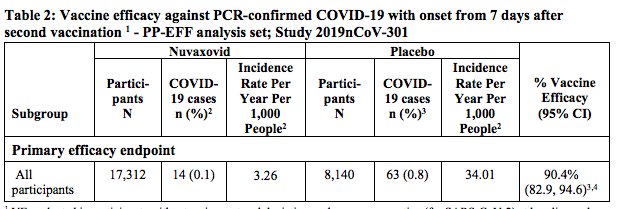

In clinical trails there are two Subgroup:
* Participants who got the vaccine
* Participants who got placebo

* Placebo: 

A placebo is an inactive substance that looks like the drug or treatment being tested. Comparing results from the two groups suggests whether changes in the test group result from the treatment or occur by chance.

In [1]:
# DATA
nuvaxovid <- list(nV.I=14,nP.I=63,nV=17312,nP=8140)

* nP.I: &emsp; number of people in placebo gp who got Infected


* nV.I: &emsp; number of people in vaccine gp who got Infected


* nV:  &emsp;  number people in vaccine gp


* nP:  &emsp;   number people in placebo gp


* pA:  &emsp;  probability to get infected


* prob:&emsp; probability to get infected while you are vaccinated


* epsilon:&emsp;efficacy of vaccine = 1 - prob

In [3]:
library(rjags)
library(rstan)
library(runjags)
library(tibble)

In [4]:
# DEFINE the MODEL 
model_vaccine <- "model{
nP.I ~ dbin(pA, nP)         
nV.A ~ dbin(pA, nV) 
nV.I ~ dbin(prob, nV.A)     # prob = 1 - epsilon

# Priors of nodes with no parents 
pA ~ dbeta(1,1) 
prob ~ dbeta(1,1) 

epsilon <- 1 - prob         # epsilon is efficiency
}"

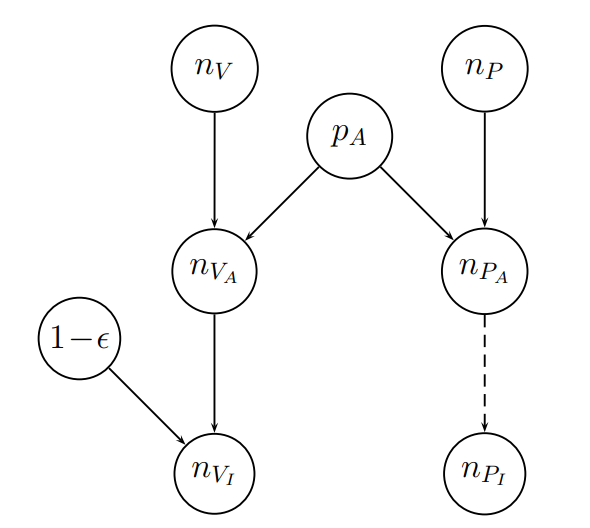

#### Efficiency is the $\epsilon$ here

In [6]:
model_jags_nuvaxovid <- jags.model(textConnection(model_vaccine),data=nuvaxovid,inits = list(.RNG.name= "base::Wichmann-Hill", .RNG.seed=14))
update(model_jags_nuvaxovid, 1000) 

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model




model : our model which we defined

variable.names : values to trace in the chain

n.iter : number of iteration to run the chain

In [7]:
post_sim <- coda.samples(model=model_jags_nuvaxovid,variable.names = c("epsilon","nV.A"),n.iter=100000)
posterior_nuvaxovid<- post_sim
Summary_nuvaxovid <- summary(posterior_nuvaxovid)
Summary_nuvaxovid$statistics

,Mean,SD,Naive SE,Time-series SE
epsilon,0.8867017,0.03281034,0.0001037554,0.0001832461
nV.A,133.2819000,20.26764910,0.0640919340,0.1706357079


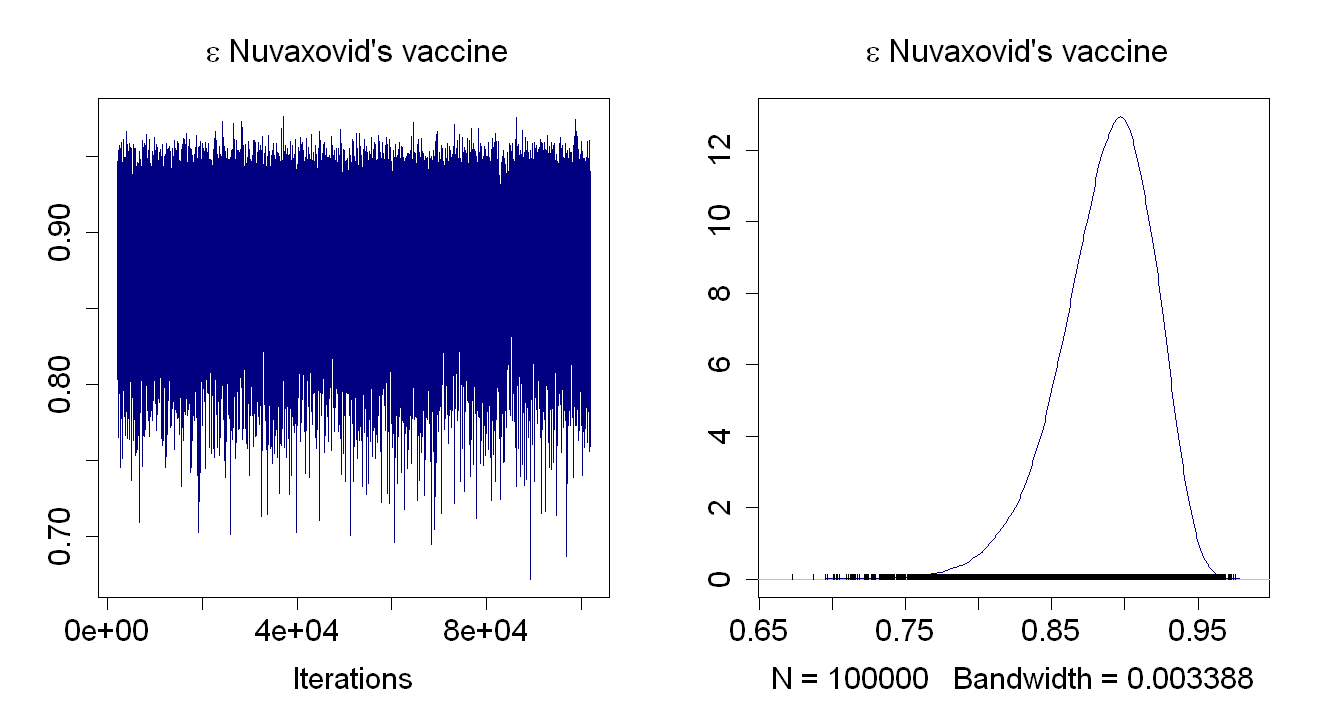

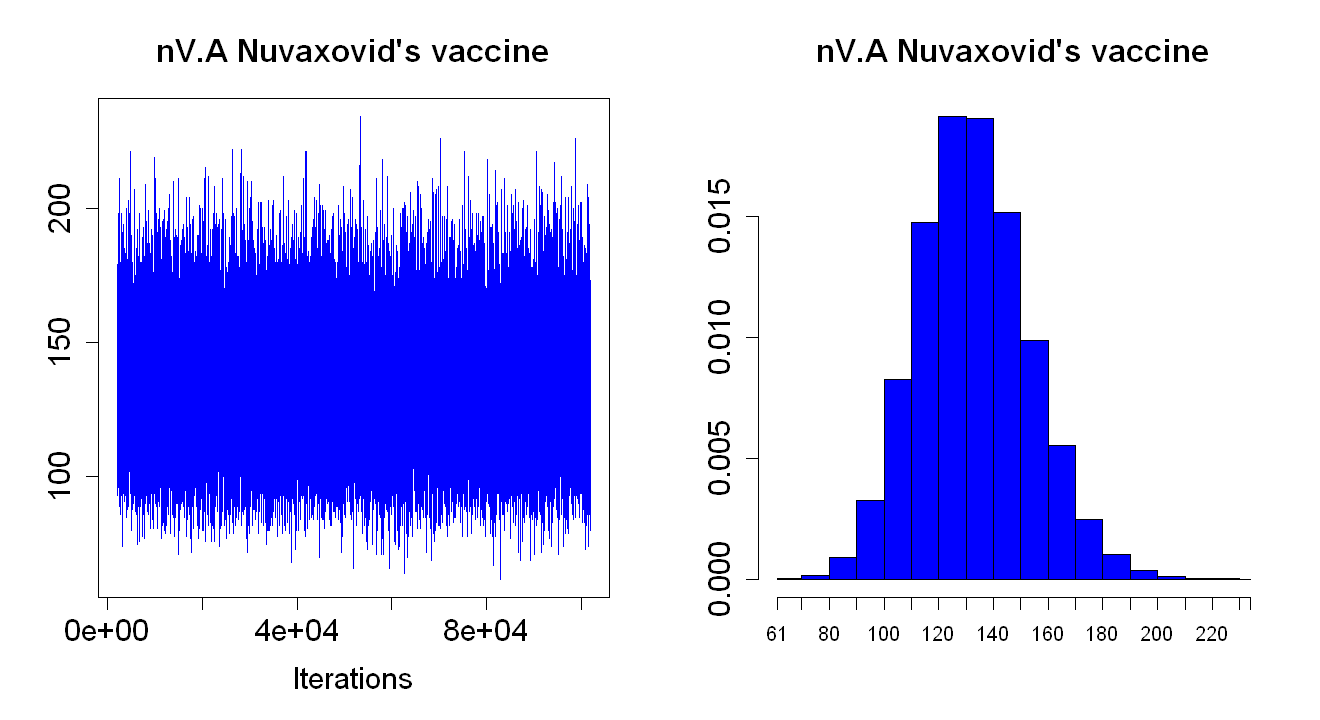

In [8]:
epsilon_nuvaxovid_mean <- Summary_nuvaxovid$statistics[1,1]
epsilon_nuvaxovid_std <- Summary_nuvaxovid$statistics[1,2]
mean.nV.A_nuvaxovid <- Summary_nuvaxovid$statistics[2,1]
std.nV.A_nuvaxovid <- Summary_nuvaxovid$statistics[2,2]
options(repr.plot.width=11, repr.plot.height =6)
plot(posterior_nuvaxovid[,1],trace=TRUE,col="navy",main =  ~ epsilon ~ "Nuvaxovid's vaccine",cex.lab=1.5, cex.axis=1.5, cex.main=1.6 )
plot(posterior_nuvaxovid[,2],trace=TRUE,col="blue",main =  "nV.A Nuvaxovid's vaccine",cex.lab=1.5, cex.axis=1.5, cex.main=1.6 )


In [9]:
samples_matrixE <- as.matrix(posterior_nuvaxovid) 
head(samples_matrixE,5)
density_E <- density(samples_matrixE[,1])
index_maxE <- which.max(density_E$y)

epsilon,nV.A
0.9024625,120
0.9168550,104
0.8996985,117
0.8409947,119
0.8642070,112


In [10]:
modeE <- density_E$x[index_maxE]


lower=Summary_nuvaxovid$quantiles[1,1]*100
upper=Summary_nuvaxovid$quantiles[1,5]*100
cat(paste('The 95% credible interval for Nuvaxovid vaccine efficacy is[',round(lower,1),'%,',round(upper,1),'%]',"\n"))
cat(paste("The Mode of Nuvaxovid's vaccine efficacy is", modeE ,"\n"))
cat(paste("The Mean of Nuvaxovid's vaccine efficacy is", epsilon_nuvaxovid_mean ,"\n"))
Summary_nuvaxovid$quantiles

The 95% credible interval for Nuvaxovid vaccine efficacy is[ 81.2 %, 94 %] 
The Mode of Nuvaxovid's vaccine efficacy is 0.896568281271461 
The Mean of Nuvaxovid's vaccine efficacy is 0.886701732779579 


,2.5%,25%,50%,75%,97.5%
epsilon,0.812041,0.8672942,0.8903623,0.9101275,0.9400265
nV.A,96.000000,119.0000000,132.0000000,146.0000000,175.0000000


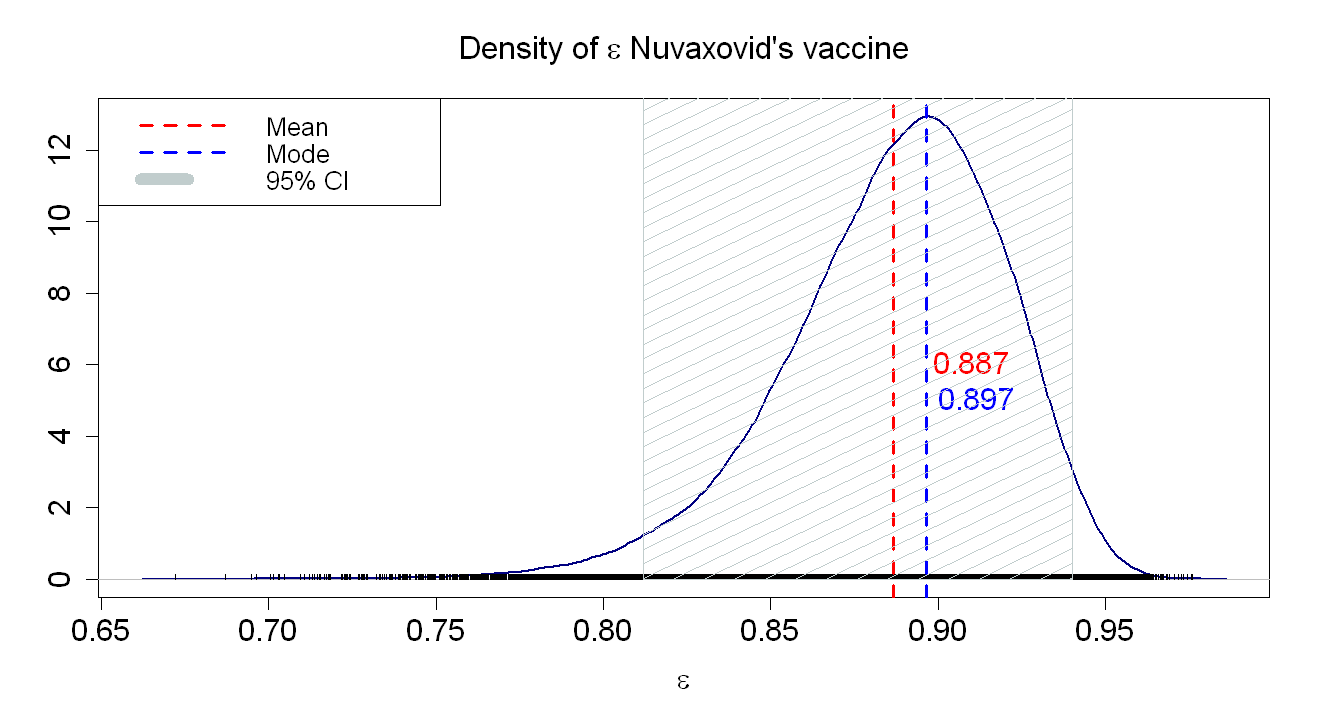

In [165]:
plot(posterior_nuvaxovid[,1],trace=FALSE,col="navy",xlab=expression(epsilon),main="Density of" ~ epsilon ~ "Nuvaxovid's vaccine",lwd=2,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
abline(v = epsilon_nuvaxovid_mean, col="red", lwd=3, lty=2)
abline(v = density_E$x[index_maxE], col="blue", lwd=3, lty=2)
text(density_E$x[index_maxE],         
     5,                                               
     round(density_E$x[index_maxE],digits = 3),         
     pos = 4,col = "blue",cex=1.5) 
text(0.895,                                    
     6,                                             
     round(epsilon_nuvaxovid_mean,3),         
     pos = 4,col = "red",cex=1.5) 
rect(lower*0.01, 0, upper*0.01, 16, density = 10, border = "azure3", col = "azure3")

legend("topleft", legend=c("Mean", "Mode","95% CI"),
       col=c("red", "blue","azure3"), lty=c(2,2,2),lwd=c(3,3,10), cex=1.3) 


* Define a function to do same computation for all vaccines and plot important information about efficiency:

In [149]:
#take data and name of vaccine as input and gives all important features for the vaccine and plot them

plot_95CI<- function(data,name) {
    model_jags <- jags.model(textConnection(model_vaccine),data=data,inits = list(.RNG.name= "base::Wichmann-Hill", .RNG.seed=14))
    update(model_jags, 1000) 
    post_sim <- coda.samples(model=model_jags,variable.names = c("epsilon","nV.A"),n.iter=100000)
    posterior<- post_sim
    Summary <- summary(posterior)
    epsilon_mean <- Summary$statistics[1,1]
    epsilon_std <- Summary$statistics[1,2]
    mean.nV.A <- Summary$statistics[2,1]
    std.nV.A<- Summary$statistics[2,2]
    samples_matrixE <- as.matrix(posterior) 
    head(samples_matrixE,5)
    density_E <- density(samples_matrixE[,1])
    index_maxE <- which.max(density_E$y)
    modeE <- density_E$x[index_maxE]

    lower=Summary$quantiles[1,1]*100
    upper=Summary$quantiles[1,5]*100
    plot(posterior[,1],trace=FALSE,col="navy",xlab=expression(epsilon),main=paste("Density of epsilon",name,"'s vaccine\n","95%CI=[",round(lower,1),'%,',round(upper,1),"%]"),lwd=2,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
    abline(v = epsilon_mean, col="red", lwd=3, lty=2)
    abline(v = density_E$x[index_maxE], col="navy", lwd=3, lty=2)
    text(density_E$x[index_maxE],         
         5,                                               
         round(density_E$x[index_maxE],digits = 3),         
         pos = 4,col = "navy",cex=1.5) 
    text(density_E$x[index_maxE],                                   
         6,                                             
         round(epsilon_mean,3),         
         pos = 4,col = "red",cex=1.5) 
    rect(lower*0.01, 0, upper*0.01, 35, density = 10, border = "azure3", col = "azure3")
    
    legend("topleft", legend=c("Mean", "Mode","95% CI"),
           col=c("red", "navy","azure3"), lty=c(2,2,2),lwd=c(3,3,10), cex=1.3) 
    return(c(name,round(epsilon_mean,3),round(epsilon_std,3),round(modeE,3),round(Summary$quantiles[1,1]*100,3),round(Summary$quantiles[1,5]*100,3),data$nV.I,data$nV,data$nP.I,data$nP))

}

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



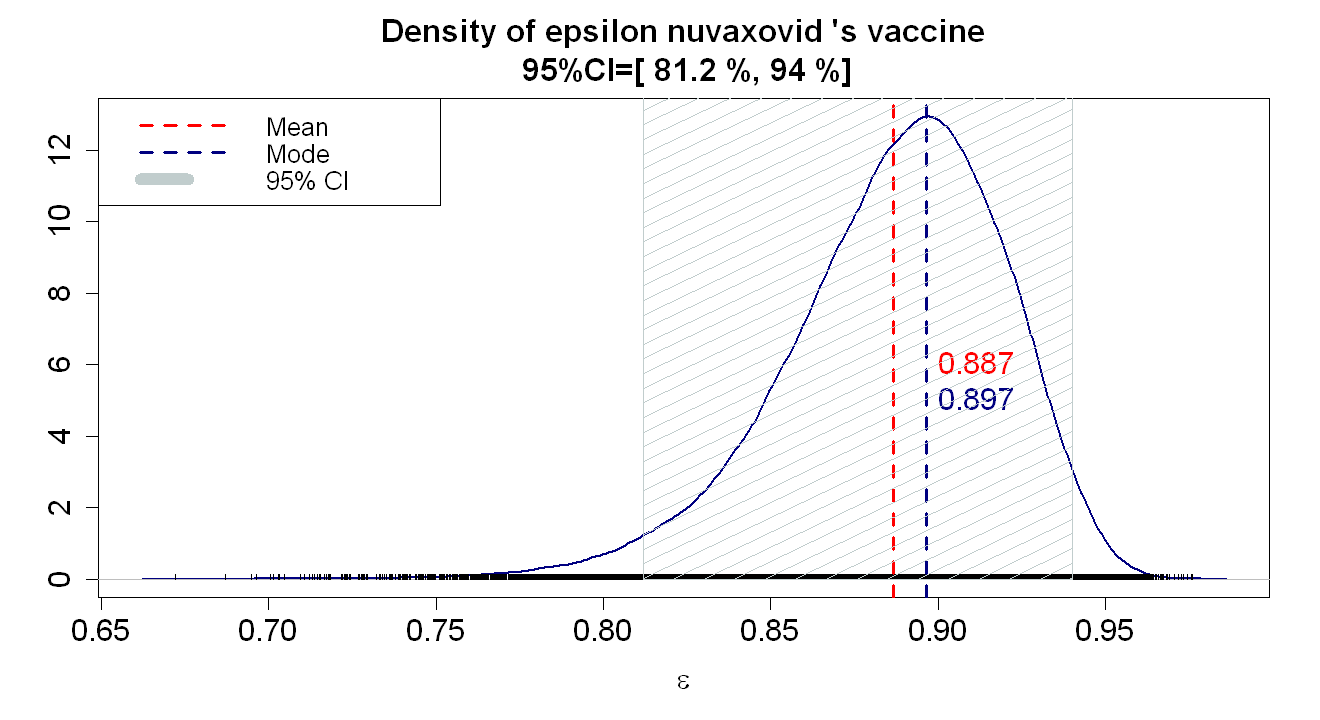

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



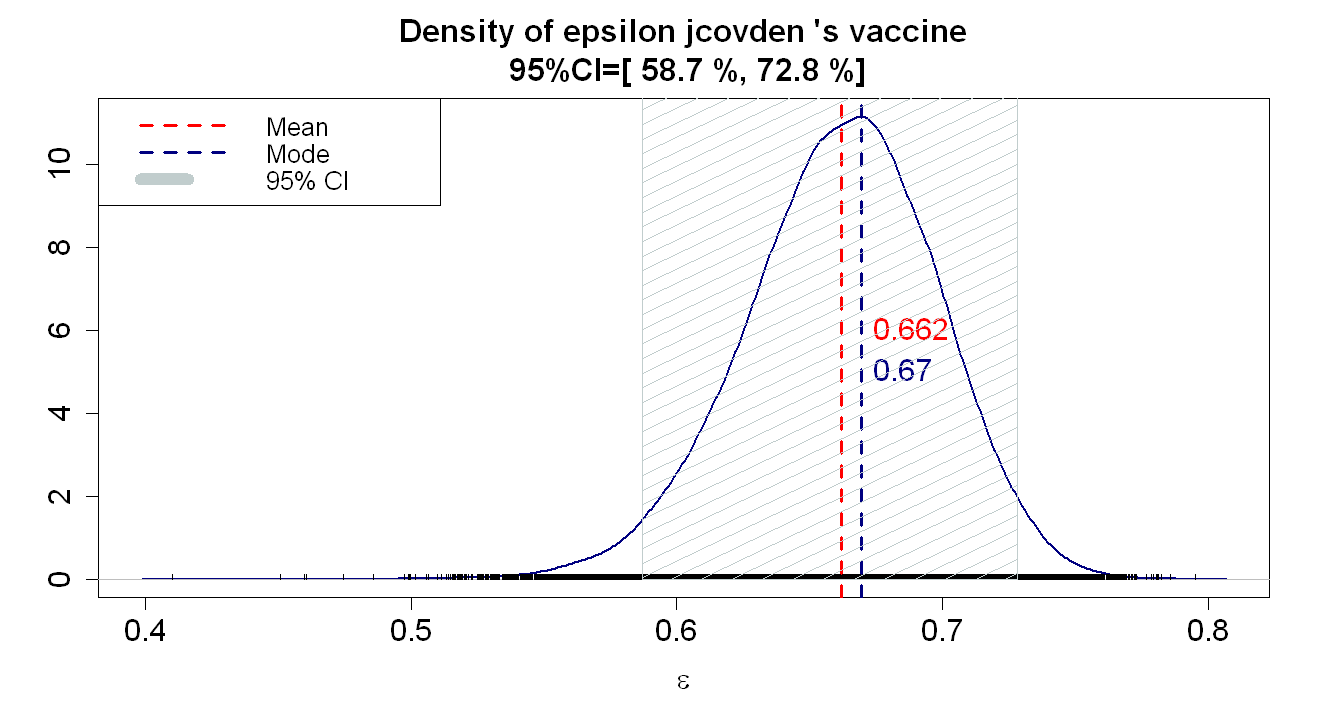

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



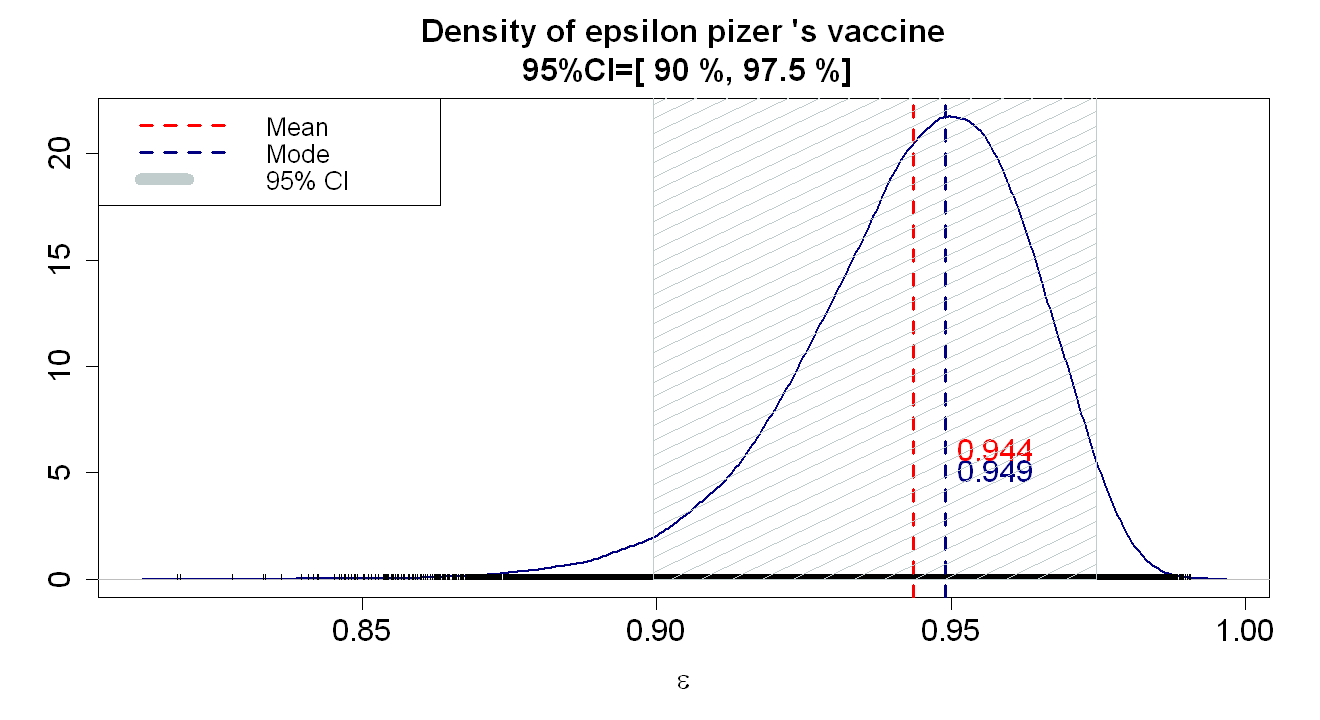

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



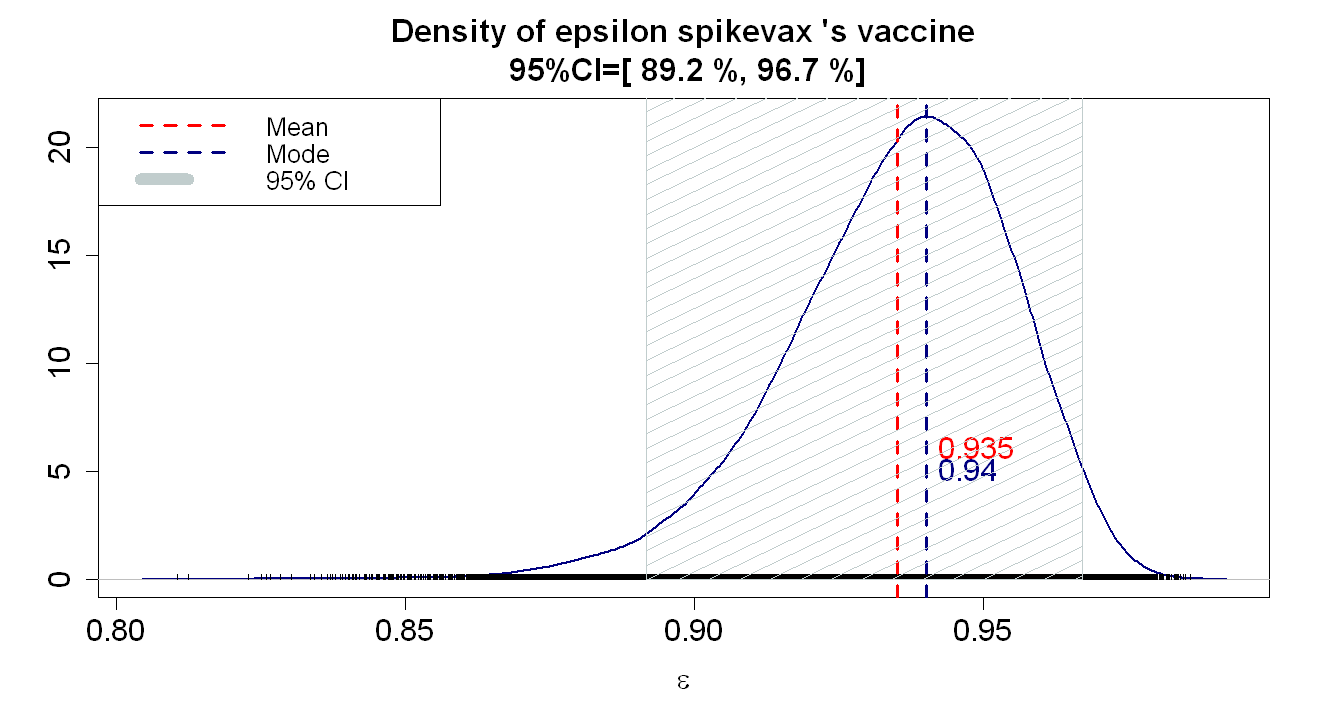

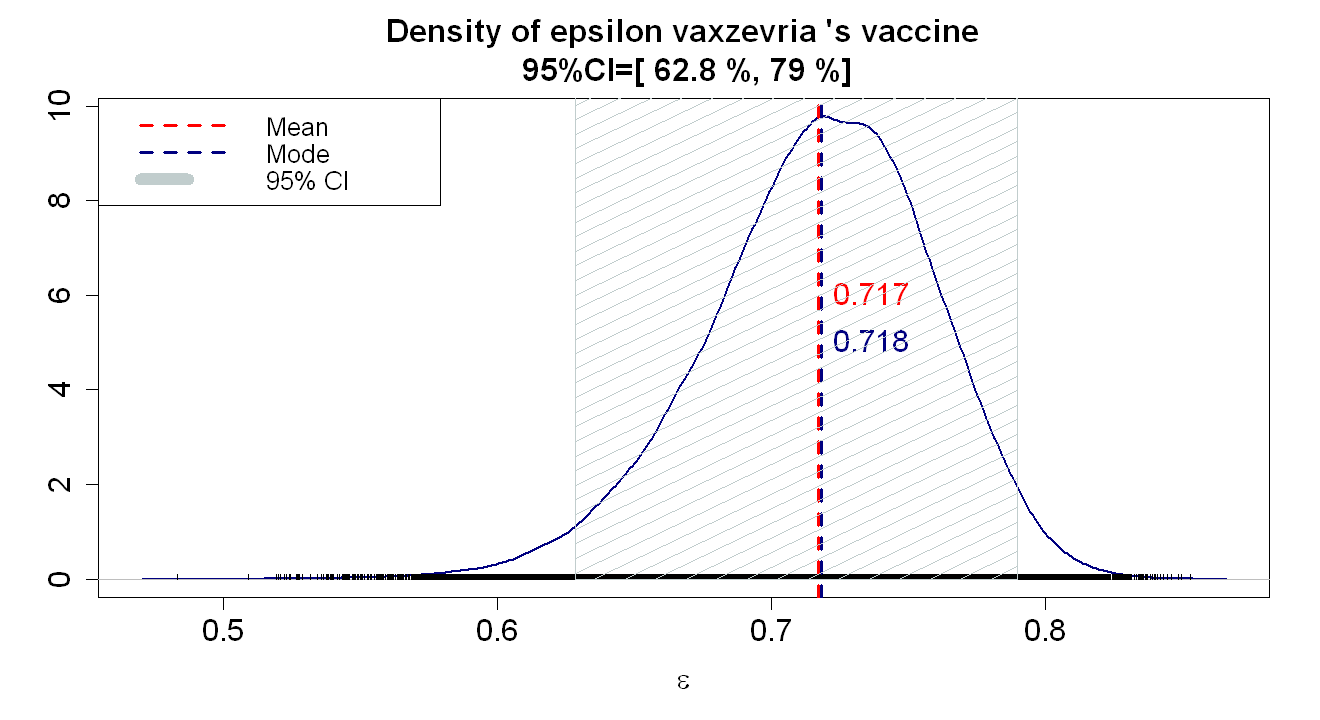

In [117]:
#data:
nuvaxovid <- list(nV.I=14,nP.I=63,nV=17312,nP=8140)
jcovden <-list(nV.I=116,nP.I=348,nV=19630,nP=19691)
pizer <- list(nV.I=8,nP.I=162,nV=18198,nP=18325)
spikevax <- list(nV.I=11,nP.I=185,nV=14134,nP=14073)
vaxzevria <- list(nV.I=73,nP.I=130,nV=17312,nP=8550)

#results
df=data.frame("Name"=0,"Efficancy_mean"=0,"Efficancy_std"=0,"Efficancy_Mode"=0,"Lower 95% CI"=0,"Upper 95% CI"=0,"nV.I"=0,"nV"=0,"nP.I"=0,"nP"=0)
n=plot_95CI(nuvaxovid,"nuvaxovid")
df[1,] <- n
j=plot_95CI(jcovden,"jcovden")
df[nrow(df) + 1,] <- j
p=plot_95CI(pizer,"pizer")
df[nrow(df) + 1,] <- p
s=plot_95CI(spikevax,"spikevax")
df[nrow(df) + 1,] <- s
v=plot_95CI(vaxzevria,"vaxzevria")
df[nrow(df) + 1,] <- v

In [118]:
View(df)

,Name,Efficancy_mean,Efficancy_std,Efficancy_Mode,Lower.95..CI,Upper.95..CI,nV.I,nV,nP.I,nP
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,nuvaxovid,0.887,0.033,0.897,81.204,94.003,14,17312,63,8140
2,jcovden,0.662,0.036,0.67,58.692,72.806,116,19630,348,19691
3,pizer,0.944,0.019,0.949,89.951,97.469,8,18198,162,18325
4,spikevax,0.935,0.019,0.94,89.165,96.713,11,14134,185,14073
5,vaxzevria,0.717,0.041,0.718,62.845,78.966,73,17312,130,8550


* nP.I: &emsp; number of people in placebo gp who got Infected


* nV.I: &emsp; number of people in vaccine gp who got Infected


* nV:  &emsp;  number people in vaccine gp


* nP:  &emsp;   number people in placebo gp


* epsilon:&emsp;efficacy of vaccine = 1 - prob

Now With run.jags and tidybayes

In [ ]:
library(magrittr)
library(dplyr)
library(forcats)
library(modelr)
library(ggdist)
library(tidybayes)
library(ggplot2)
library(cowplot)
library(emmeans)
library(broom)
library(rstan)
library(rstanarm)
library(brms)
library(bayesplot)
library(MCMCglmm)
library(RColorBrewer)

theme_set(theme_tidybayes() + panel_border())

In [11]:
tot_vaccine <- 17312
tot_placebo <- 8140

In [26]:
patient <- c(rep("Vaccine", tot_vaccine),rep("Placebo", tot_placebo ))
# Number of patients tested postive after RCT:
pos_vaccine <- 14
pos_placebo <- 63
tested <- c(rep("Pos", pos_vaccine),
rep("Neg", tot_vaccine - pos_vaccine),
rep("Pos", pos_placebo),
rep("Neg", tot_placebo - pos_placebo ))
nuvaxovid.tb <- tibble(tested = tested , patient=patient)
table(nuvaxovid.tb[[2]], nuvaxovid.tb[[1]])
nuvaxovid.tb[1,]

         
            Neg   Pos
  Placebo  8077    63
  Vaccine 17298    14

tested,patient
<chr>,<chr>
Pos,Vaccine


* Defining the model:

In [27]:
modelString <- "
model {
for ( i in 1:Ntot ) {
tested[i] ~ dbern( theta[patient[i]] )
}
for ( k in 1:Nclass ) {
theta[k] ~ dbeta(3 , 100)
}
}"

In [28]:
dataList = list(
tested = ifelse(nuvaxovid.tb$tested == "Neg", 0, 1),
patient = as.integer(factor(nuvaxovid.tb$patient )),
Ntot = nrow(nuvaxovid.tb) ,
Nclass = nlevels(factor(nuvaxovid.tb$patient ))
)

In [29]:
nuvaxovid_chains <- run.jags(modelString ,sample = 15000,n.chains = 4,method = "parallel",monitor = "theta",data = dataList )

Warning message:
"No initial values were provided - JAGS will use the same initial values for all chains"
Warning message:
"You attempted to start parallel chains without setting different PRNG for each chain, which is not recommended.  Different .RNG.name values have been added to each set of initial values."


Calling 4 simulations using the parallel method...
Following the progress of chain 1 (the program will wait for all chains
to finish before continuing):
Welcome to JAGS 4.3.0 on Fri Jul 22 11:29:58 2022
JAGS is free software and comes with ABSOLUTELY NO WARRANTY
Loading module: basemod: ok
Loading module: bugs: ok
. . Reading data file data.txt
. Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 25452
   Unobserved stochastic nodes: 2
   Total graph size: 50910
. Reading parameter file inits1.txt
. Initializing model
. Adaptation skipped: model is not in adaptive mode.
. Updating 4000
-------------------------------------------------| 4000
************************************************** 100%
. . Updating 15000
-------------------------------------------------| 15000
************************************************** 100%
. . . . Updating 0
. Deleting model
. 
All chains have finished
Note: the model did not r

* theta[1]: Placebo

* theta[2]: Vaccine

In [30]:
summary(nuvaxovid_chains)

,Lower95,Median,Upper95,Mean,SD,Mode,MCerr,MC%ofSD,SSeff,AC.10,psrf
theta[1],0.006127570,0.0079541850,0.00997898,0.0080015468,0.0009857305,NA,4.919362e-06,0.5,40151,-0.001550237,0.9999934
theta[2],0.000544689,0.0009544845,0.00145195,0.0009741127,0.0002352537,NA,1.176268e-06,0.5,40000,-0.001886389,1.0001471


In [34]:
nuvaxovid_res <- tidybayes::tidy_draws(nuvaxovid_chains) %>% select('theta[1]':'theta[2]') %>%
rename(Placebo = 'theta[1]', Vaccine = 'theta[2]') %>% mutate(diff_rate =(Placebo-Vaccine)/Placebo * 100 , Placebo_perc = Placebo * 100,Vaccine_perc = Vaccine * 100)

In [37]:
allmcmc2 <- as.mcmc(nuvaxovid_res , vars="diff_rate")
Summary_nuvaxovid_stan=summary(allmcmc2)

In [38]:
Summary_nuvaxovid_stan$statistics

,Mean,SD,Naive SE,Time-series SE
Placebo,8.002211e-03,0.0009845934,4.019586e-06,4.019586e-06
Vaccine,9.748794e-04,0.0002353262,9.607150e-07,9.607150e-07
diff_rate,8.763288e+01,3.3742132890,1.377517e-02,1.377517e-02
Placebo_perc,8.002211e-01,0.0984593440,4.019586e-04,4.019586e-04
Vaccine_perc,9.748794e-02,0.0235326151,9.607150e-05,9.607150e-05


In [39]:
Summary_nuvaxovid_stan$quantiles

,2.5%,25%,50%,75%,97.5%
Placebo,6.185920e-03,0.007318935,7.956435e-03,0.008643865,0.0100568
Vaccine,5.705982e-04,0.000808383,9.552955e-04,0.001121630,0.0014890
diff_rate,7.997548e+01,85.655946014,8.800568e+01,90.034156075,93.1664693
Placebo_perc,6.185920e-01,0.731893500,7.956435e-01,0.864386500,1.0056800
Vaccine_perc,5.705982e-02,0.080838300,9.552955e-02,0.112163000,0.1489000


In [120]:
lower=summary(allmcmc2)$quantiles[3,1]
upper=summary(allmcmc2)$quantiles[3,5]
epsilon_nuvaxovid_mean_stan <- Summary_nuvaxovid_stan$statistics[3,1]
epsilon_nuvaxovid_std_stan <- Summary_nuvaxovid_stan$statistics[3,2]
mean.nV.A_nuvaxovid_stan <- Summary_nuvaxovid_stan$statistics[4,1]
std.nV.A_nuvaxovid_stan <- Summary_nuvaxovid_stan$statistics[4,2]

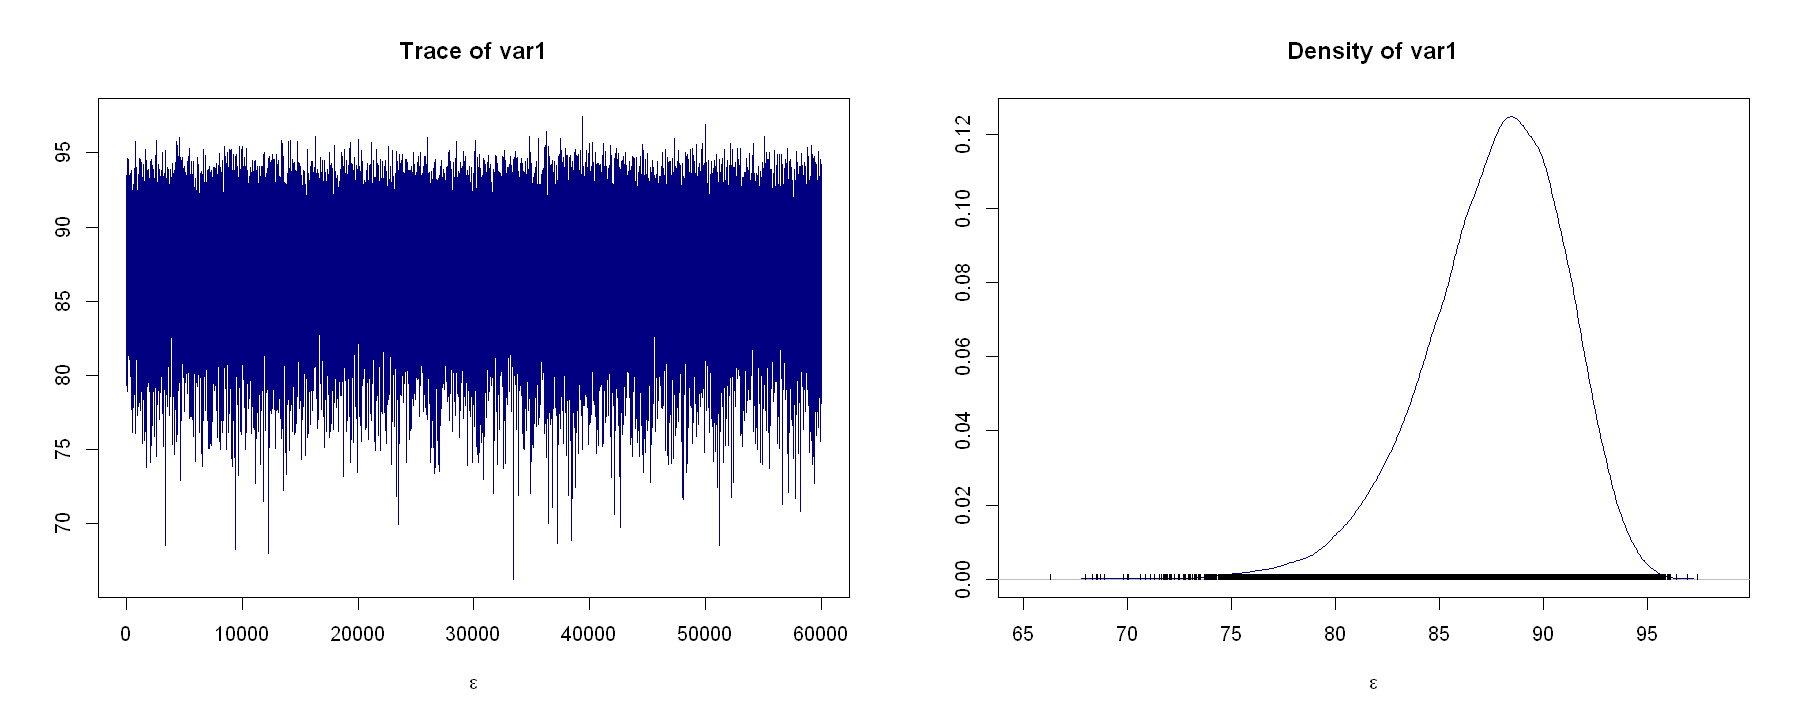

In [130]:
allmcmc2 <- as.mcmc(nuvaxovid_res , vars="diff_rate")

options(repr.plot.width=15, repr.plot.height =6)

plot(allmcmc2[,"diff_rate"],col="navy",xlab=expression(epsilon))

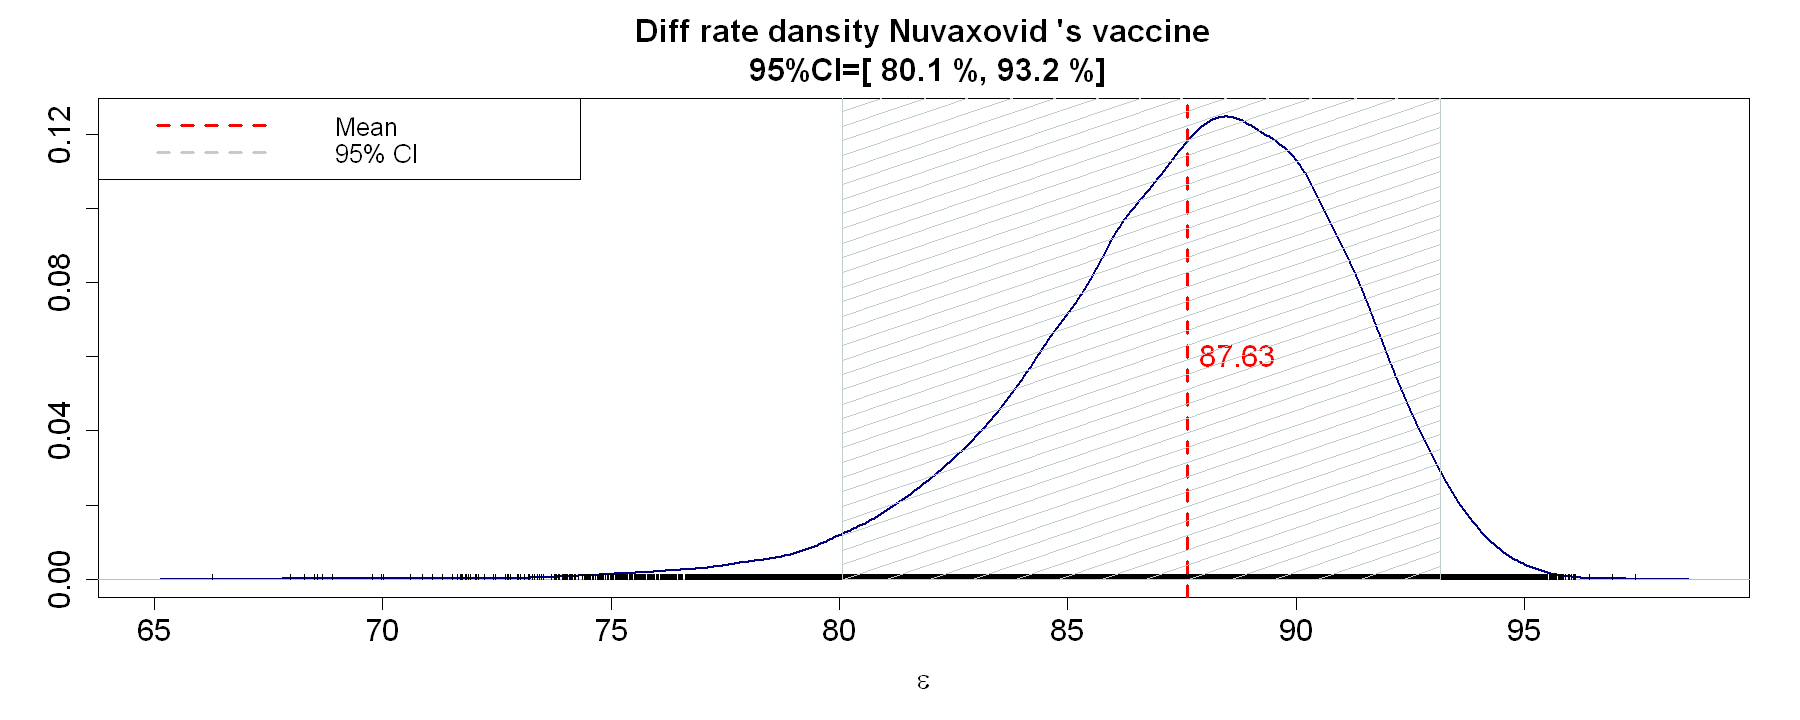

In [153]:
plot(allmcmc2[,"diff_rate"],trace=FALSE,col="navy",xlab=expression(epsilon),main=paste("Diff rate dansity","Nuvaxovid","'s vaccine\n","95%CI=[",round(lower,1),'%,',round(upper,1),"%]"),lwd=2,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
abline(v = epsilon_nuvaxovid_mean_stan, col="red", lwd=3, lty=2)
    text(epsilon_nuvaxovid_mean_stan,0.06,round(epsilon_nuvaxovid_mean_stan,3),pos = 4,col = "red",cex=1.5)
    rect(lower,0,upper, 35, density = 10, border = "azure3", col = "azure3")
    legend("topleft", legend=c("Mean","95% CI"),
           col=c("red", "azure3"), lty=c(2,2,2),lwd=c(3,3,10), cex=1.3) 

## Study on type of vaccine and the age

For each Vaccine in different subgroups finding:
* CI 95%
* Mean Efficancy
* Mode
<hr>
Subgroups:

* 18 _ 65
* 65 _ 75
* 75 and more

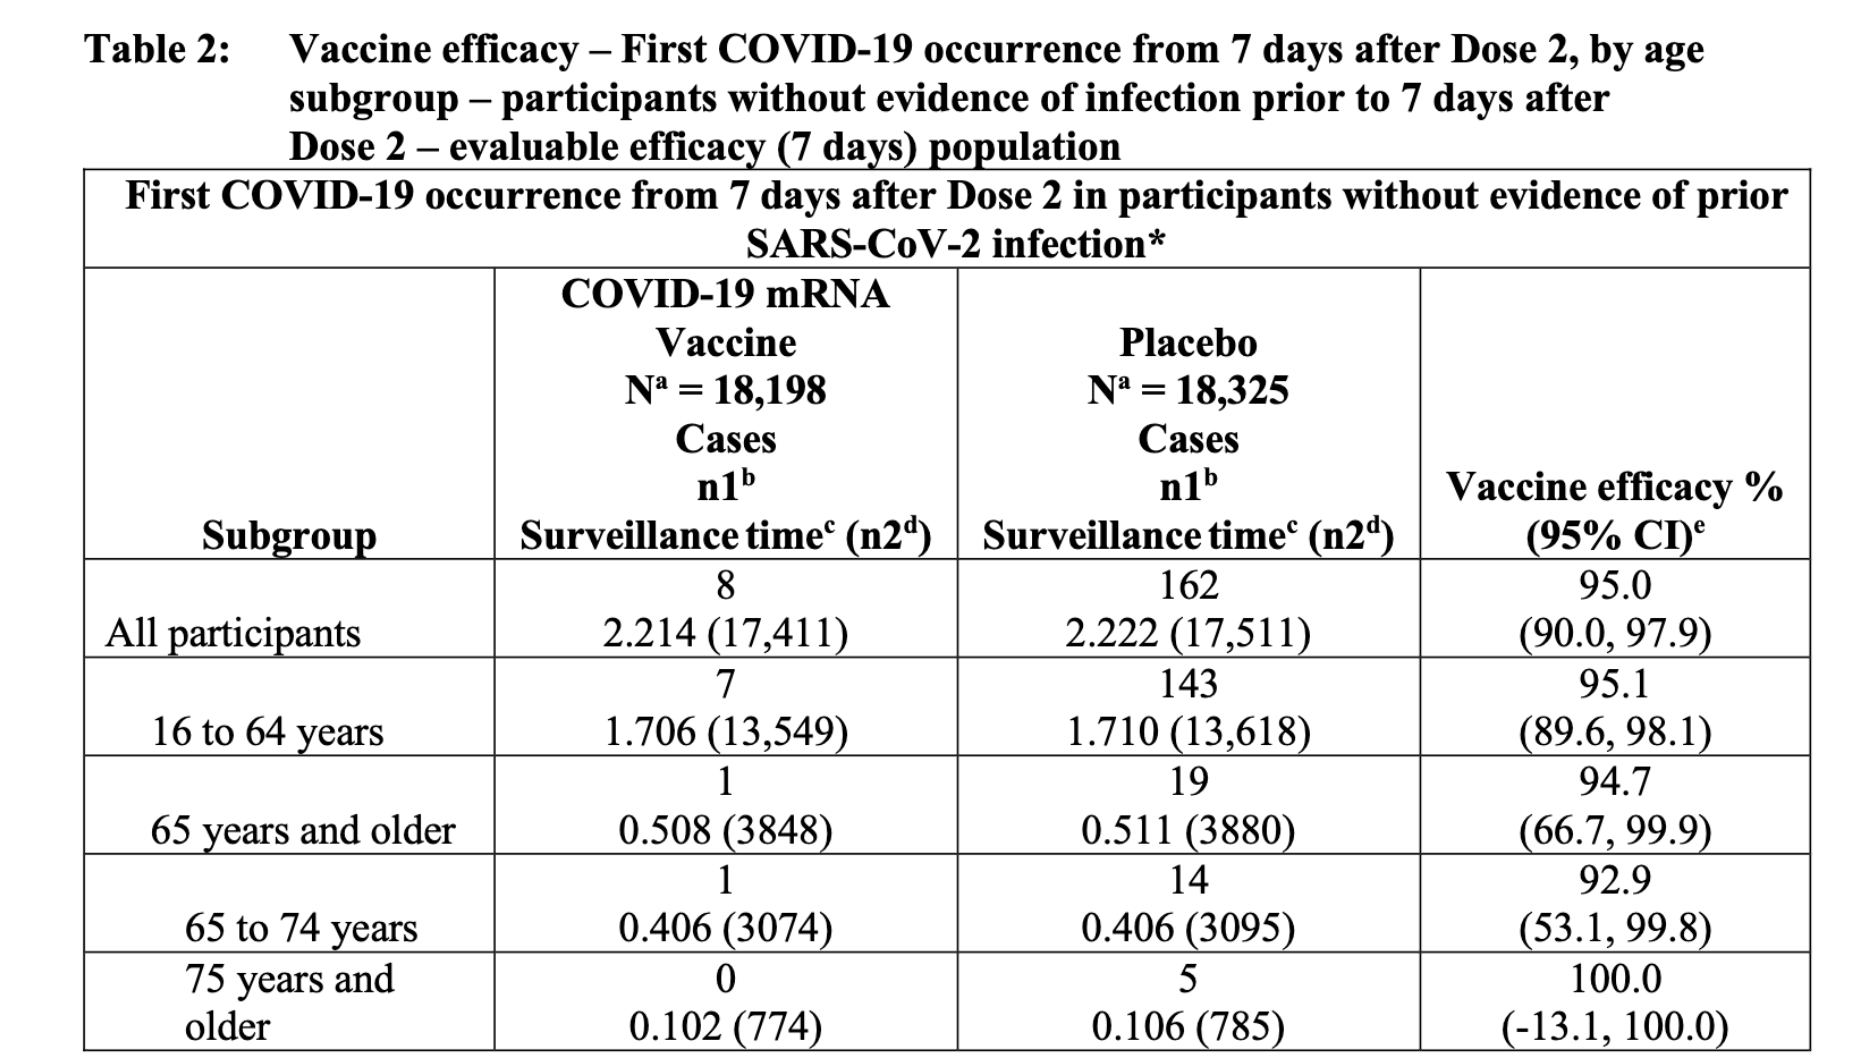

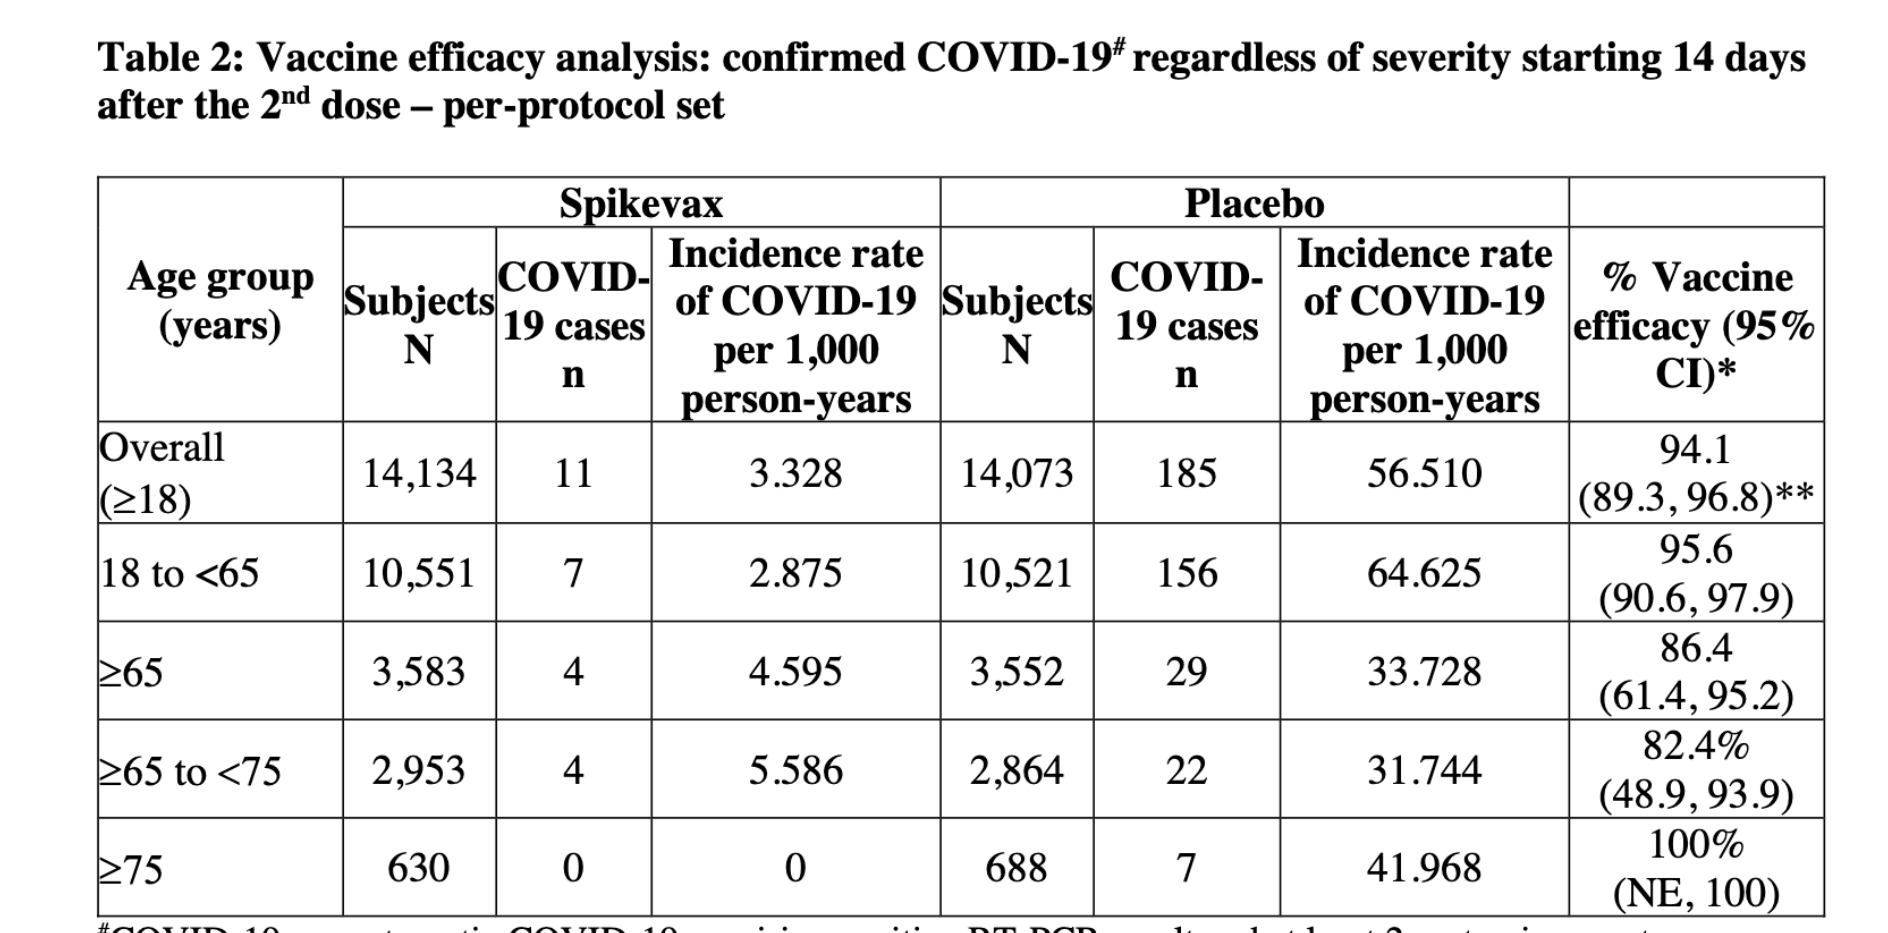

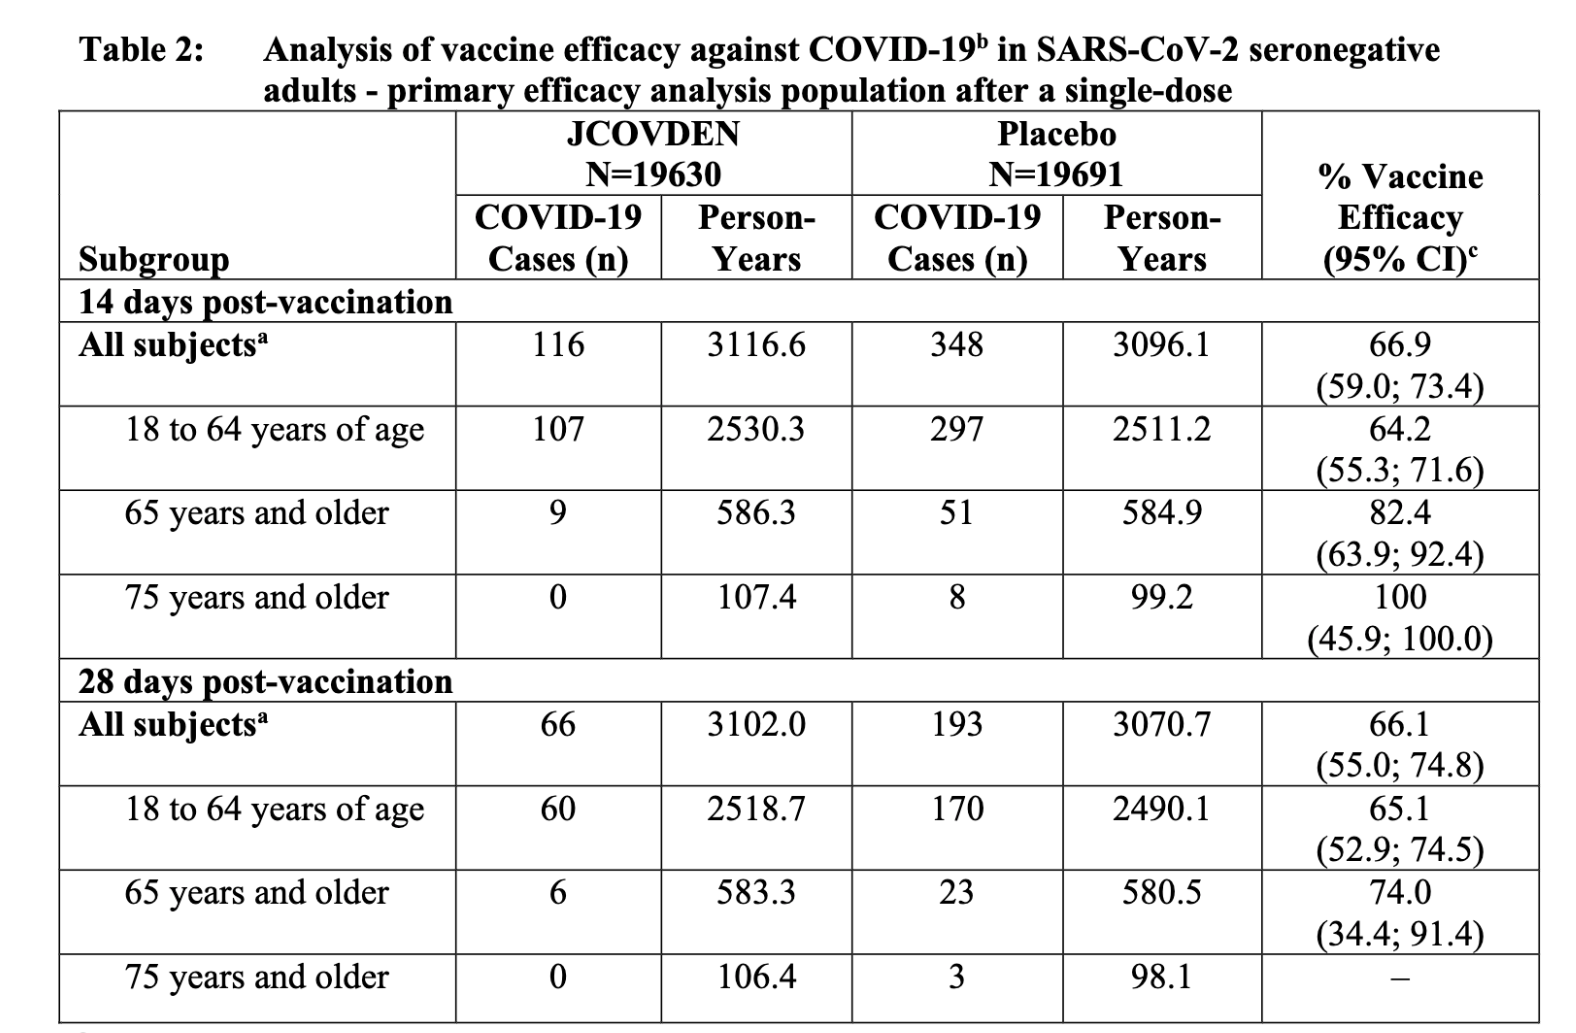

In [59]:
#moderna data by age 
md_18 <- list(nV.I = 7, nP.I=156,nV = 10551,nP = 10521)
md_65 <- list(nV.I = 4,nP.I=22, nV = 2953,nP=2864)
md_75 <- list(nV.I=0,nP.I=7,nV=630,nP=688)

#janseen data by age 

jc_18 <- list(nV.I= 60, nP.I=170,nV=2518,nP=2490)
jc_65 <- list(nV.I=6,nP.I=20,nV = 477, nP=482)
jc_75 <- list(nV.I=0,nP.I=3,nV=106,nP=98)

#pfizer data by age 

pf_18 <- list(nV.I=7,nP.I=143, nV=13549,nP=13618)
pf_65 <-list(nV.I=1, nP.I=14,nV=3074,nP=3095)
pf_75 <- list(nV.I=0,nP.I=5, nV=774,nP=785)

In [63]:
df_ages=data.frame("Name"=0,"Efficancy_mean"=0,"Efficancy_std"=0,"Efficancy_Mode"=0,"Lower 95% CI"=0,"Upper 95% CI"=0,"nV.I"=0,"nV"=0,"nP.I"=0,"nP"=0)

plot_95CI_ages<- function(data,name) {
    model_jags <- jags.model(textConnection(model_vaccine),data=data,inits = list(.RNG.name= "base::Wichmann-Hill", .RNG.seed=14))
    update(model_jags, 1000) 
    post_sim <- coda.samples(model=model_jags,variable.names = c("epsilon","nV.A"),n.iter=100000)
    posterior<- post_sim
    Summary <- summary(posterior)
    epsilon_mean <- Summary$statistics[1,1]
    epsilon_std <- Summary$statistics[1,2]
    mean.nV.A <- Summary$statistics[2,1]
    std.nV.A<- Summary$statistics[2,2]
    samples_matrixE <- as.matrix(posterior) 
    head(samples_matrixE,5)
    density_E <- density(samples_matrixE[,1])
    index_maxE <- which.max(density_E$y)
    modeE <- density_E$x[index_maxE]

    lower=Summary$quantiles[1,1]*100
    upper=Summary$quantiles[1,5]*100
    plot(posterior[,1],trace=FALSE,col="navy",xlab=expression(epsilon),main=paste("Density of epsilon",name,"'s vaccine\n","95%CI=[",round(lower,1),'%,',round(upper,1),"%]"),lwd=2,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
    abline(v = epsilon_mean, col="red", lwd=3, lty=2)
    abline(v = density_E$x[index_maxE], col="navy", lwd=3, lty=2)
    text(density_E$x[index_maxE],         
         2,                                               
         round(density_E$x[index_maxE],digits = 3),         
         pos = 4,col = "navy",cex=1.5) 
    text(density_E$x[index_maxE],                                   
         3,                                             
         round(epsilon_mean,3),         
         pos = 4,col = "red",cex=1.5) 
    rect(lower*0.01, 0, upper*0.01, 35, density = 10, border = "azure3", col = "azure3")
    
    legend("topleft", legend=c("Mean", "Mode","95% CI"),
           col=c("red", "navy","azure3"), lty=c(2,2,2),lwd=c(3,3,10), cex=1.3)
    
    k <<-c(name,round(epsilon_mean,3),round(epsilon_std,3),round(modeE,3),round(Summary$quantiles[1,1]*100,3),round(Summary$quantiles[1,5]*100,3),data$nV.I,data$nV,data$nP.I,data$nP)
        return(posterior)
}

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



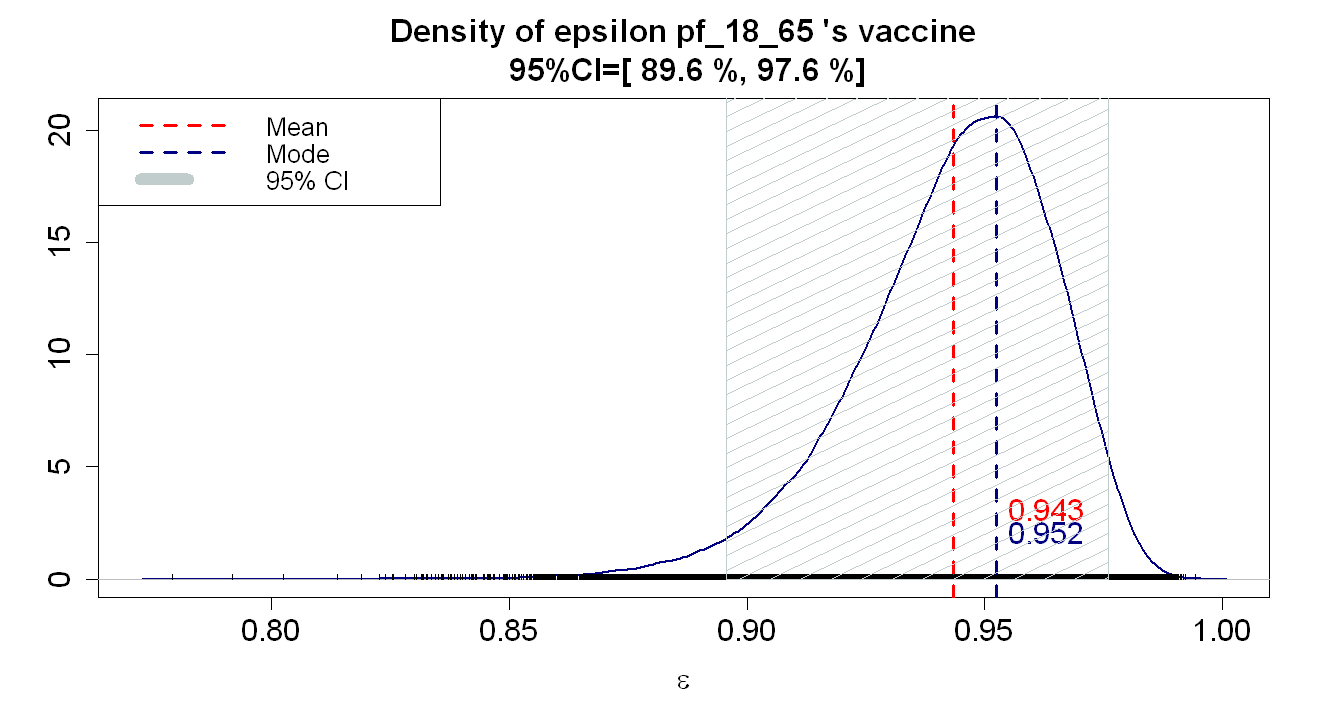

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



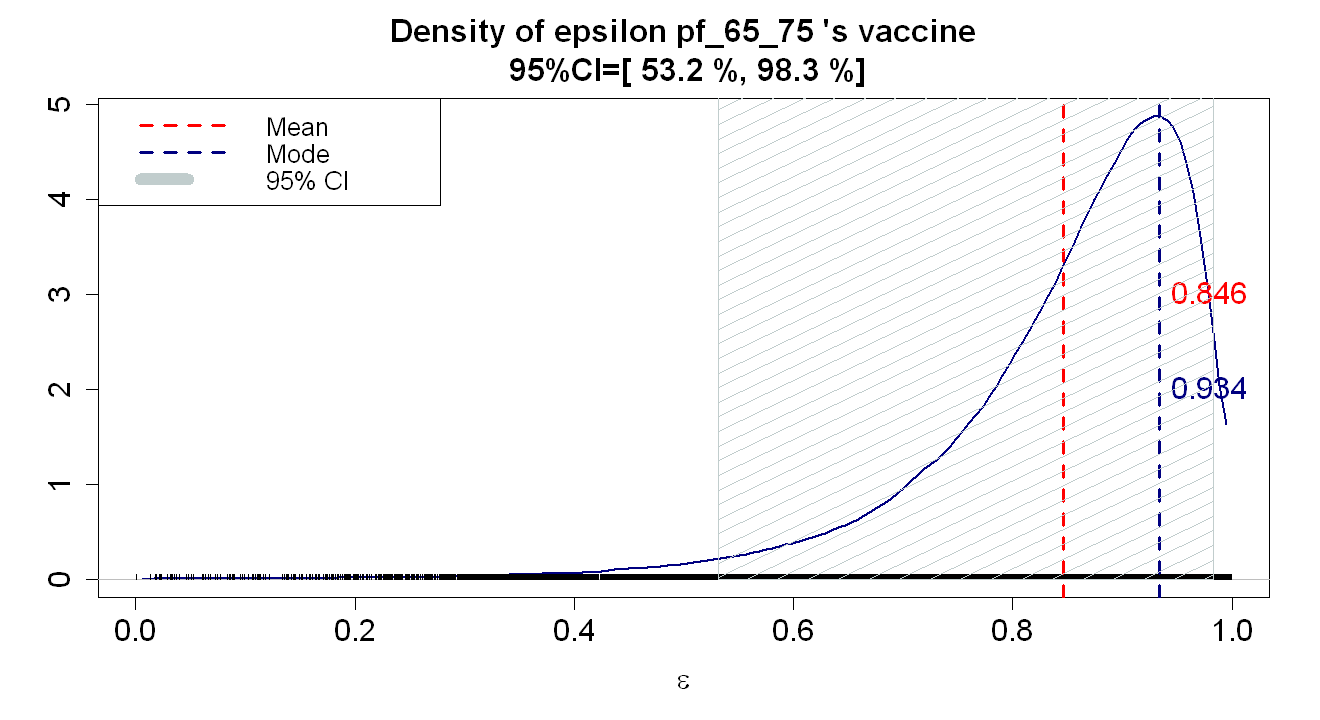

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



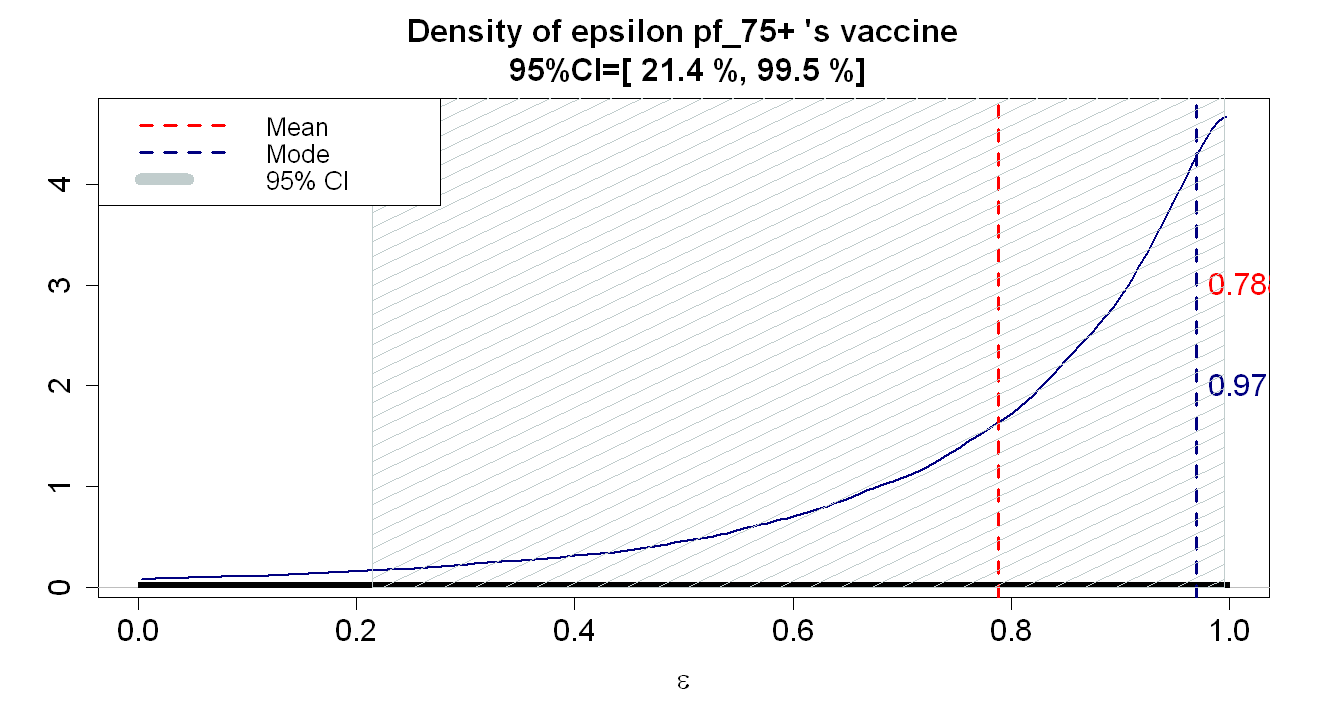

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



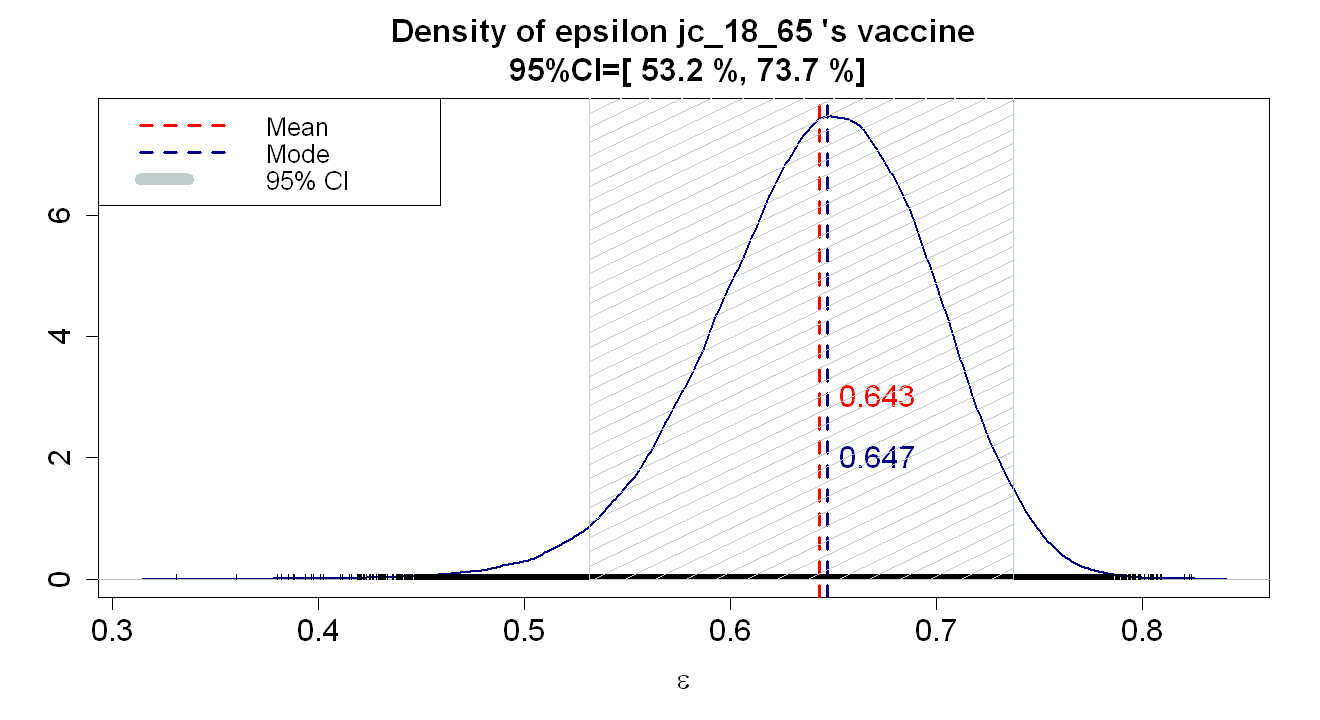

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



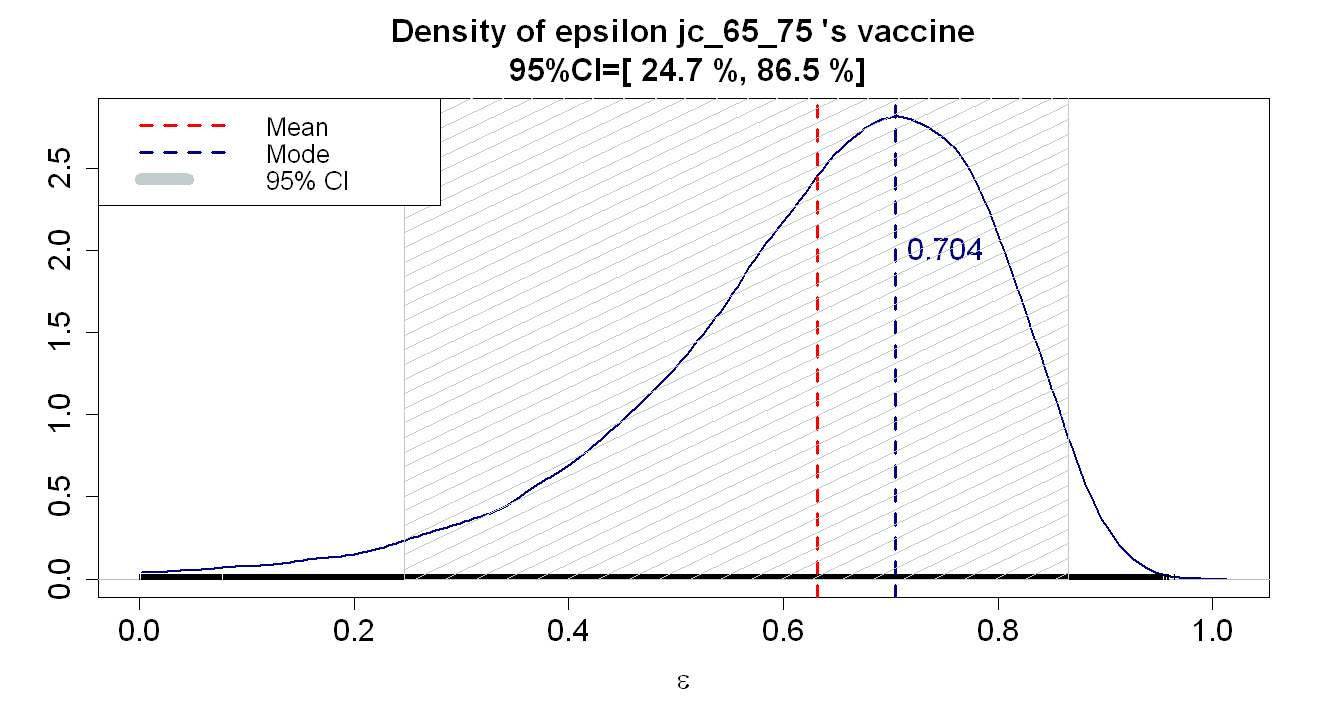

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



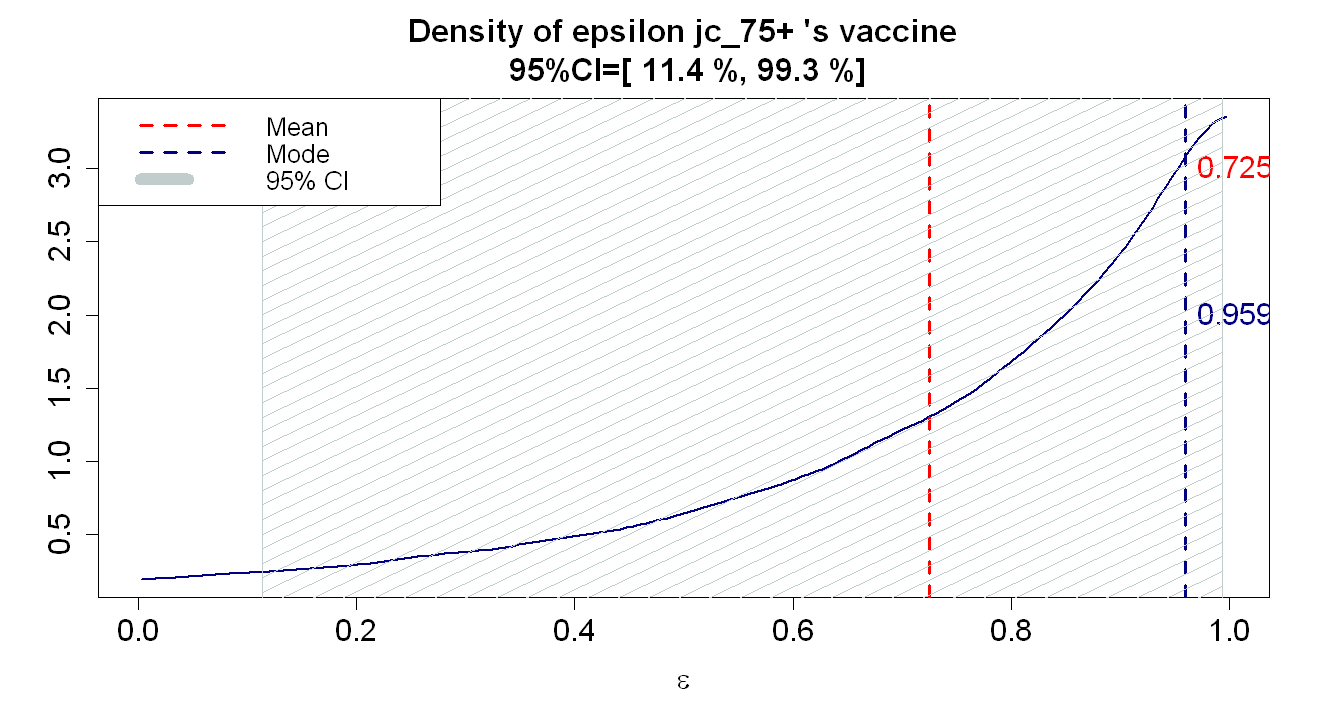

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



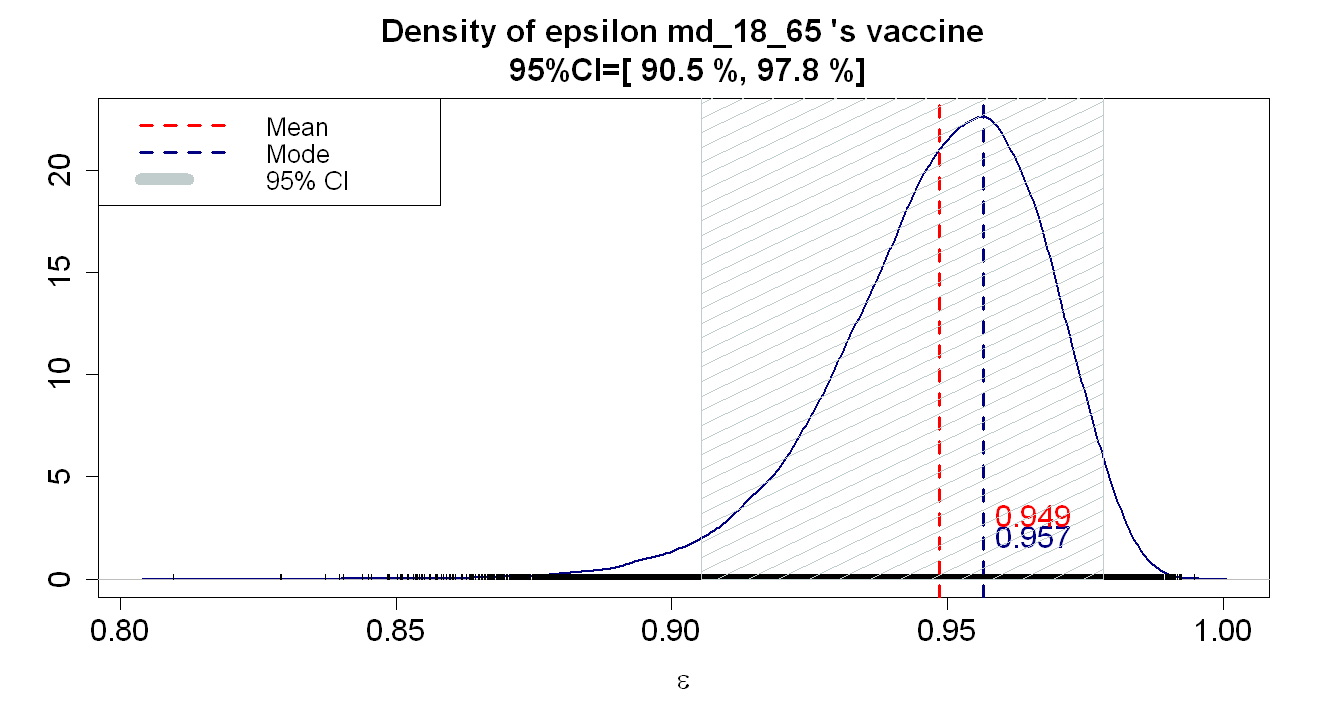

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 3
   Total graph size: 9

Initializing model



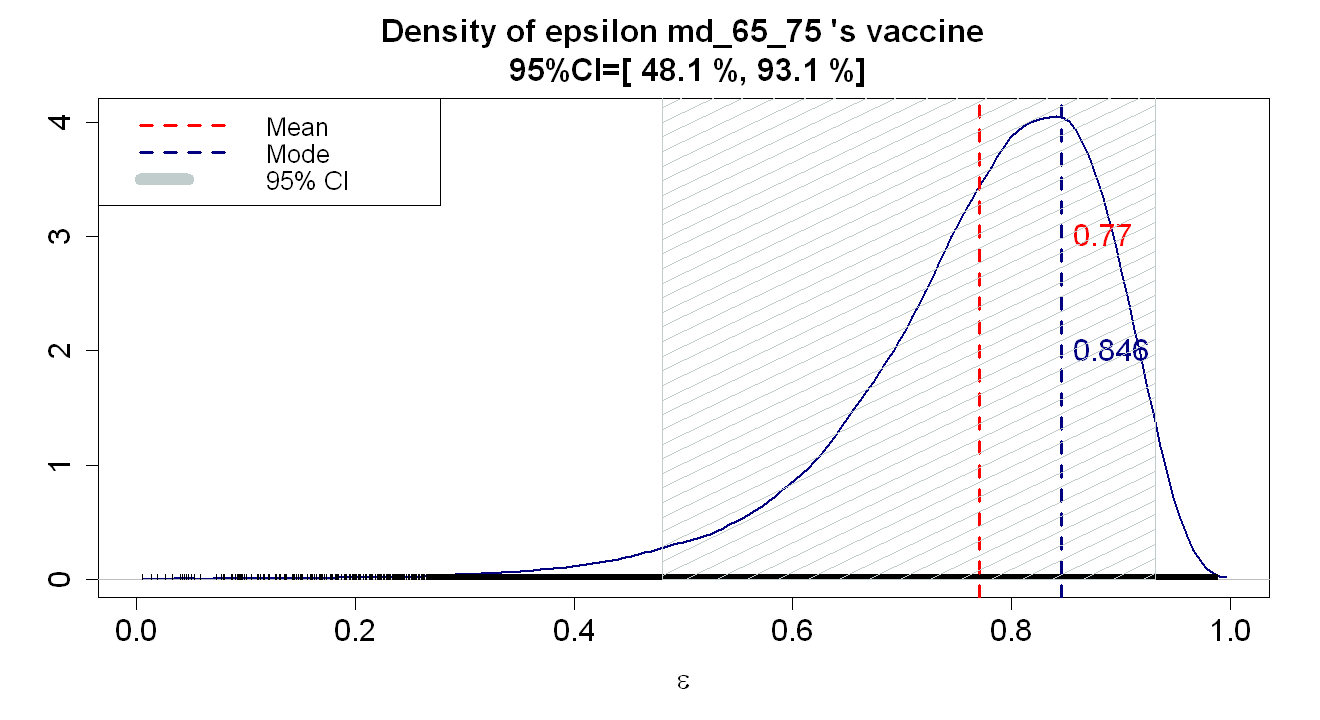

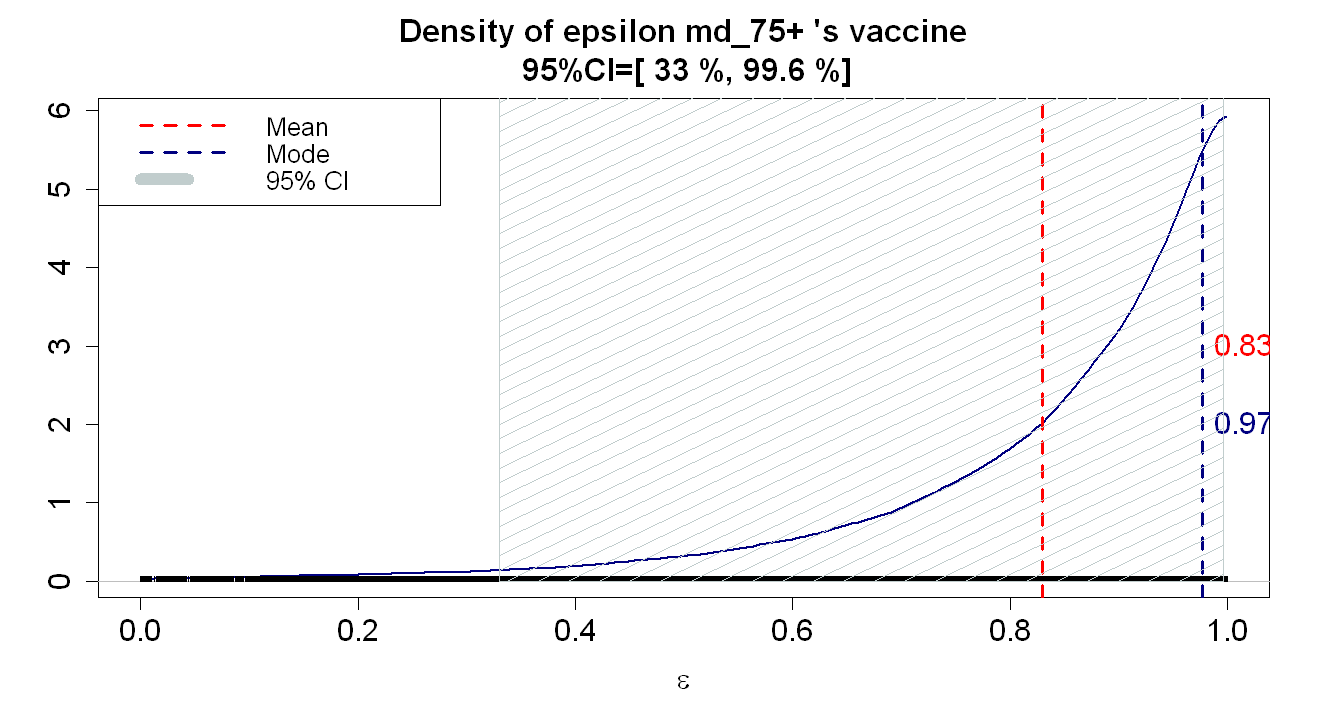

In [64]:
pf_18_r=plot_95CI_ages(pf_18,"pf_18_65")
df_ages[1,] <- k
pf_65_r=plot_95CI_ages(pf_65,"pf_65_75")
df_ages[nrow(df_ages) + 1,] <- k
pf_75_r=plot_95CI_ages(pf_75,"pf_75+")
df_ages[nrow(df_ages) + 1,] <- k

jc_18_r=plot_95CI_ages(jc_18,"jc_18_65")
df_ages[nrow(df_ages) + 1,] <- k
jc_65_r=plot_95CI_ages(jc_65,"jc_65_75")
df_ages[nrow(df_ages) + 1,] <- k
jc_75_r=plot_95CI_ages(jc_75,"jc_75+")
df_ages[nrow(df_ages) + 1,] <- k

md_18_r=plot_95CI_ages(md_18,"md_18_65")
df_ages[nrow(df_ages) + 1,] <- k
md_65_r=plot_95CI_ages(md_65,"md_65_75")
df_ages[nrow(df_ages) + 1,] <- k
md_75_r=plot_95CI_ages(md_75,"md_75+")
df_ages[nrow(df_ages) + 1,] <- k

In [68]:
df_ages

,Name,Efficancy_mean,Efficancy_std,Efficancy_Mode,Lower.95..CI,Upper.95..CI,nV.I,nV,nP.I,nP
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,pf_18_65,0.943,0.021,0.952,89.566,97.603,7,13549,143,13618
2,pf_65_75,0.846,0.119,0.934,53.186,98.304,1,3074,14,3095
3,pf_75+,0.788,0.207,0.97,21.4,99.509,0,774,5,785
4,jc_18_65,0.643,0.053,0.647,53.153,73.736,60,2518,170,2490
5,jc_65_75,0.632,0.159,0.704,24.683,86.539,6,477,20,482
6,jc_75+,0.725,0.242,0.959,11.39,99.312,0,106,3,98
7,md_18_65,0.949,0.019,0.957,90.537,97.832,7,10551,156,10521
8,md_65_75,0.770,0.117,0.846,48.104,93.134,4,2953,22,2864
9,md_75+,0.830,0.175,0.977,32.996,99.612,0,630,7,688


In [67]:
df_ages[,3]<-as.numeric(df_ages$Efficancy_std)
df_ages[,2]<-as.numeric(df_ages$Efficancy_mean)

### Plot all Vaccine efficancy_mean in different ages with error

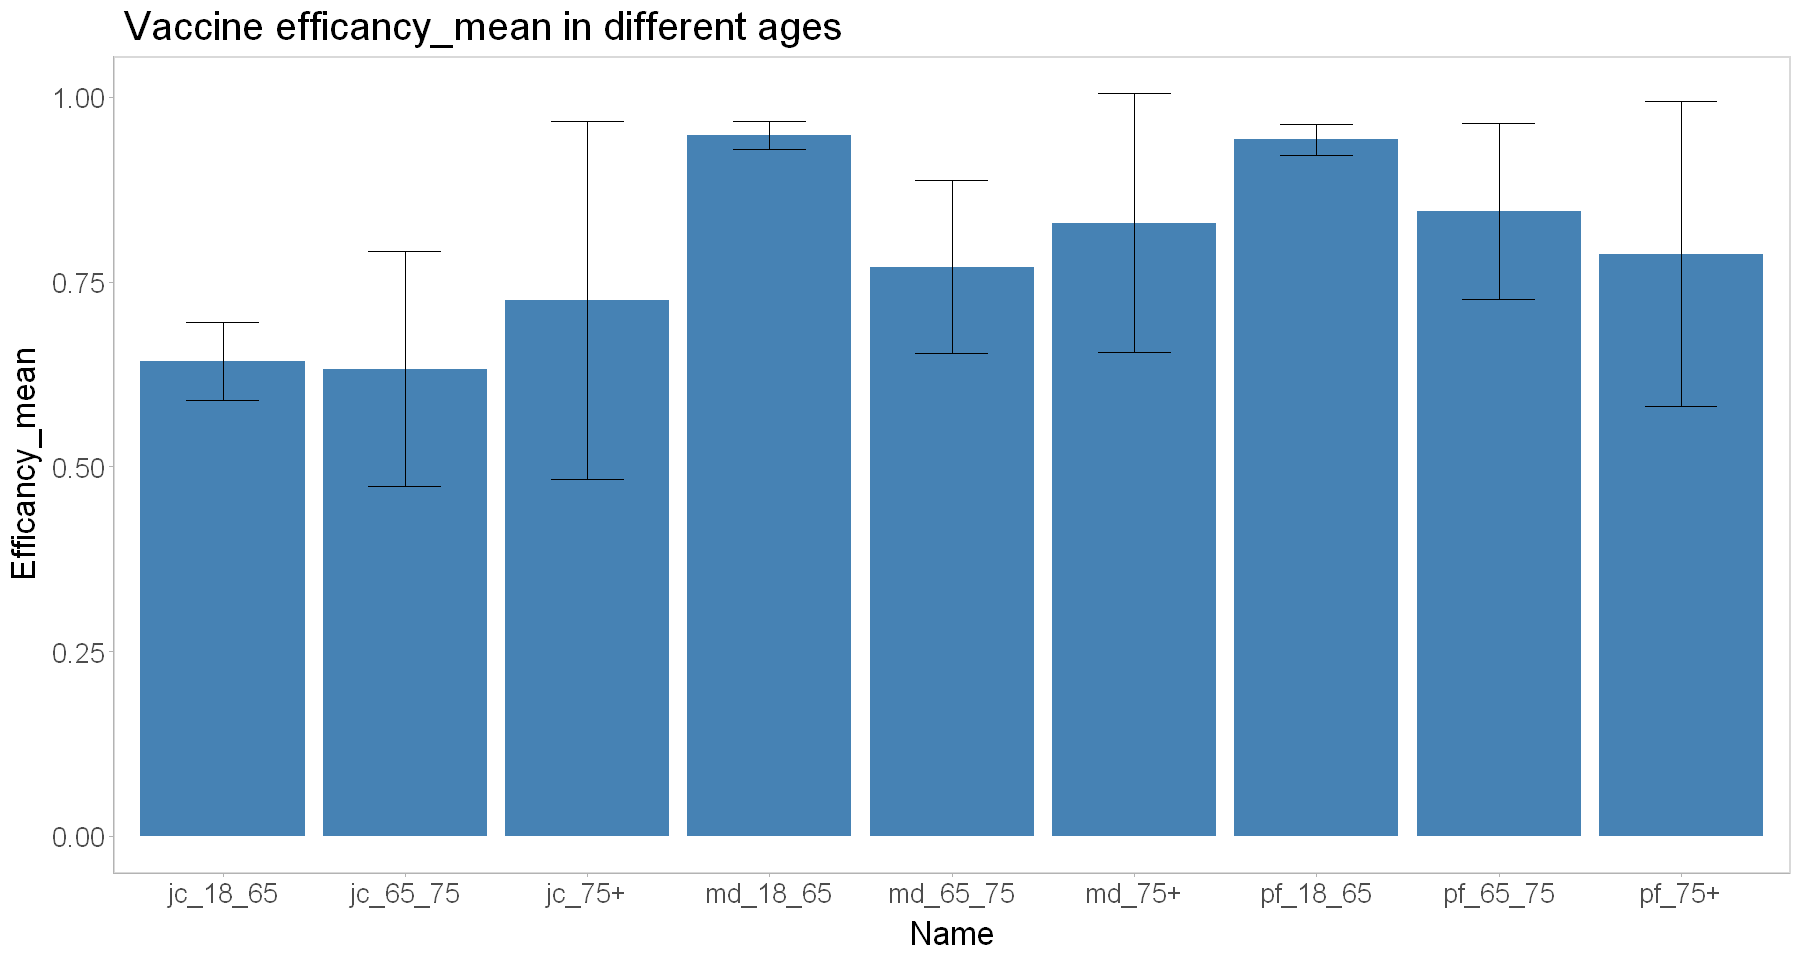

In [78]:
library(ggplot2)
options(repr.plot.width=15, repr.plot.height =8)
ggplot(df_ages) +
    geom_bar(aes(x=Name, y=Efficancy_mean), stat='identity', fill='steelblue') +
    geom_errorbar(aes(x=Name, ymin=Efficancy_mean-Efficancy_std, ymax=Efficancy_mean+Efficancy_std), width=0.4) + theme(text = element_text(size = 20))+ggtitle(" Vaccine efficancy_mean in different ages")
options(repr.plot.width=11, repr.plot.height =6)


## Study on Vaccine Efficancy for different ages

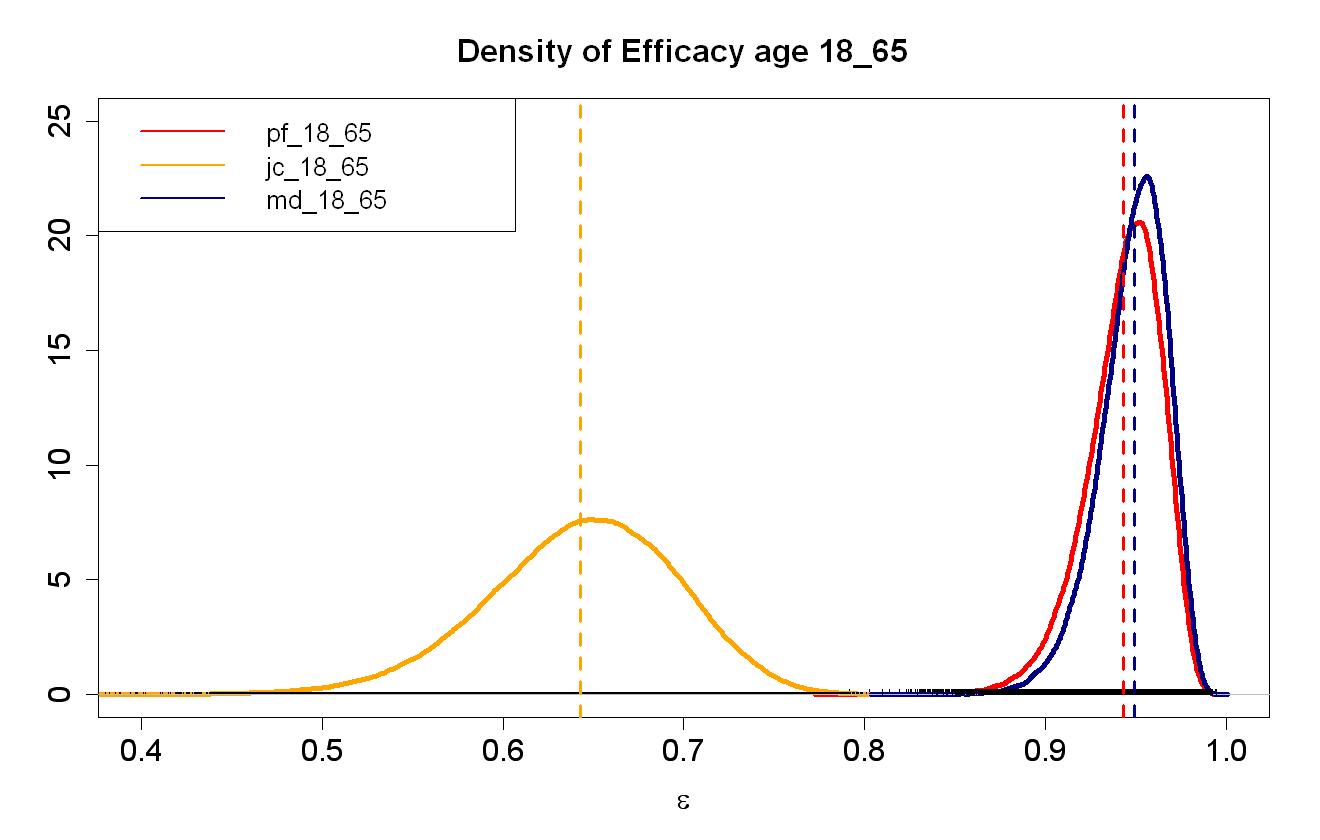

In [244]:
plot(pf_18_r[,1],trace=FALSE,col="red",xlab=expression(epsilon),xlim=c(0.4,1),ylim=c(0,25),lwd=4,cex.lab=1.5, cex.axis=1.5, cex.main=1.6,main="Density of Efficacy age 18_65")

par(new=TRUE)
plot(jc_18_r[,1],trace=FALSE,col="orange",xlab=expression(epsilon),xlim=c(0.4,1),ylim=c(0,25),lwd=4,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
par(new=TRUE)

plot(md_18_r[,1],trace=FALSE,col="navy",xlab=expression(epsilon),xlim=c(0.4,1),ylim=c(0,25),lwd=4,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
par(new=TRUE)
abline(v = df_ages[1,2], col="red", lwd=3, lty=2)
abline(v = df_ages[4,2], col="orange", lwd=3, lty=2)
abline(v = df_ages[7,2], col="navy", lwd=3, lty=2)



legend("topleft", legend=c("pf_18_65", "jc_18_65","md_18_65"),col=c("red", "orange","navy"), lty=c(1,1,1),lwd=c(2,2,2), cex=1.3)

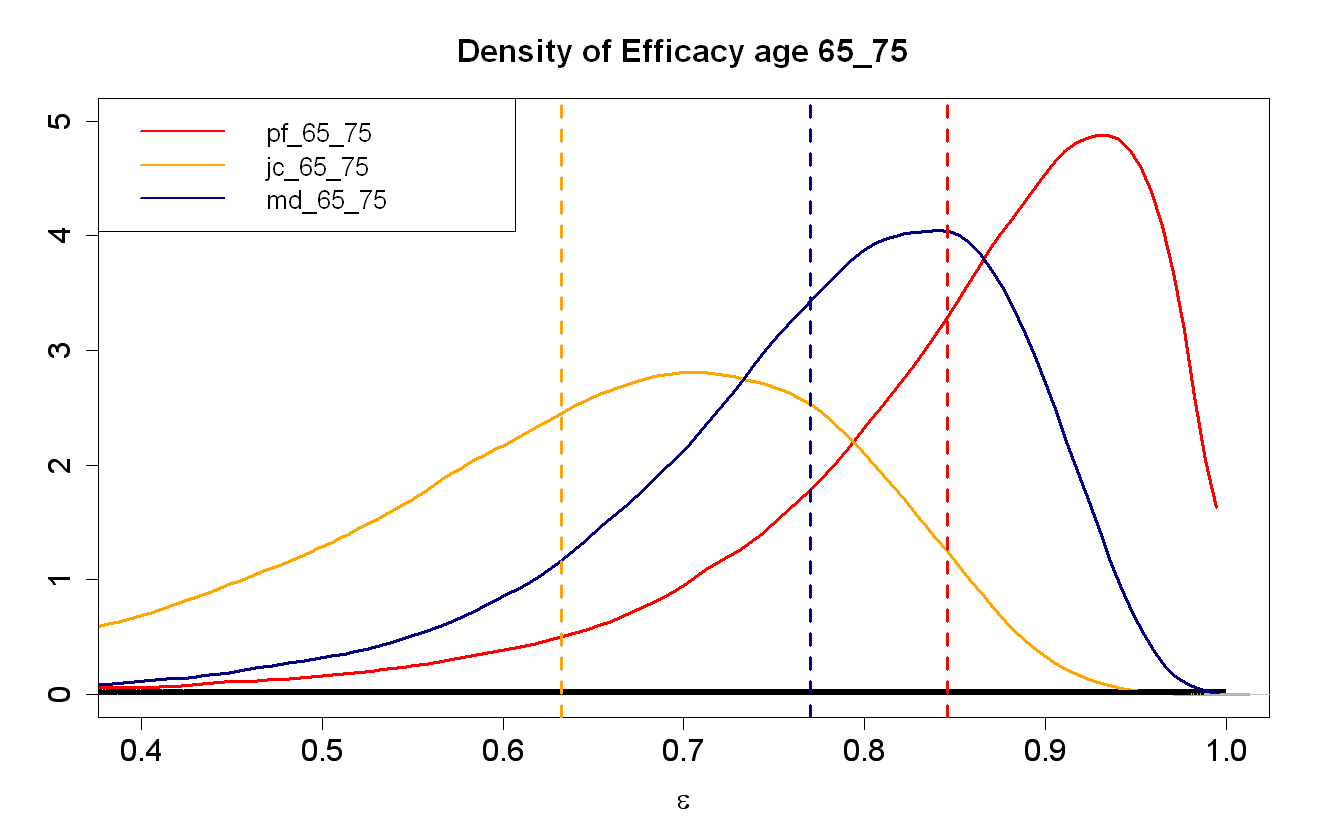

In [245]:
plot(pf_65_r[,1],trace=FALSE,col="red",xlab=expression(epsilon),xlim=c(0.4,1),ylim=c(0,5),lwd=3,cex.lab=1.5, cex.axis=1.5, cex.main=1.6,main="Density of Efficacy age 65_75")
par(new=TRUE)
plot(jc_65_r[,1],trace=FALSE,col="orange",xlab=expression(epsilon),xlim=c(0.4,1),ylim=c(0,5),lwd=3,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
par(new=TRUE)
plot(md_65_r[,1],trace=FALSE,col="navy",xlab=expression(epsilon),xlim=c(0.4,1),ylim=c(0,5),lwd=3,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
par(new=TRUE)
abline(v = df_ages[2,2], col="red", lwd=3, lty=2)
abline(v = df_ages[5,2], col="orange", lwd=3, lty=2)
abline(v = df_ages[8,2], col="navy", lwd=3, lty=2)


legend("topleft", legend=c("pf_65_75", "jc_65_75","md_65_75"),col=c("red", "orange","navy"), lty=c(1,1,1),lwd=c(2,2,2), cex=1.3)

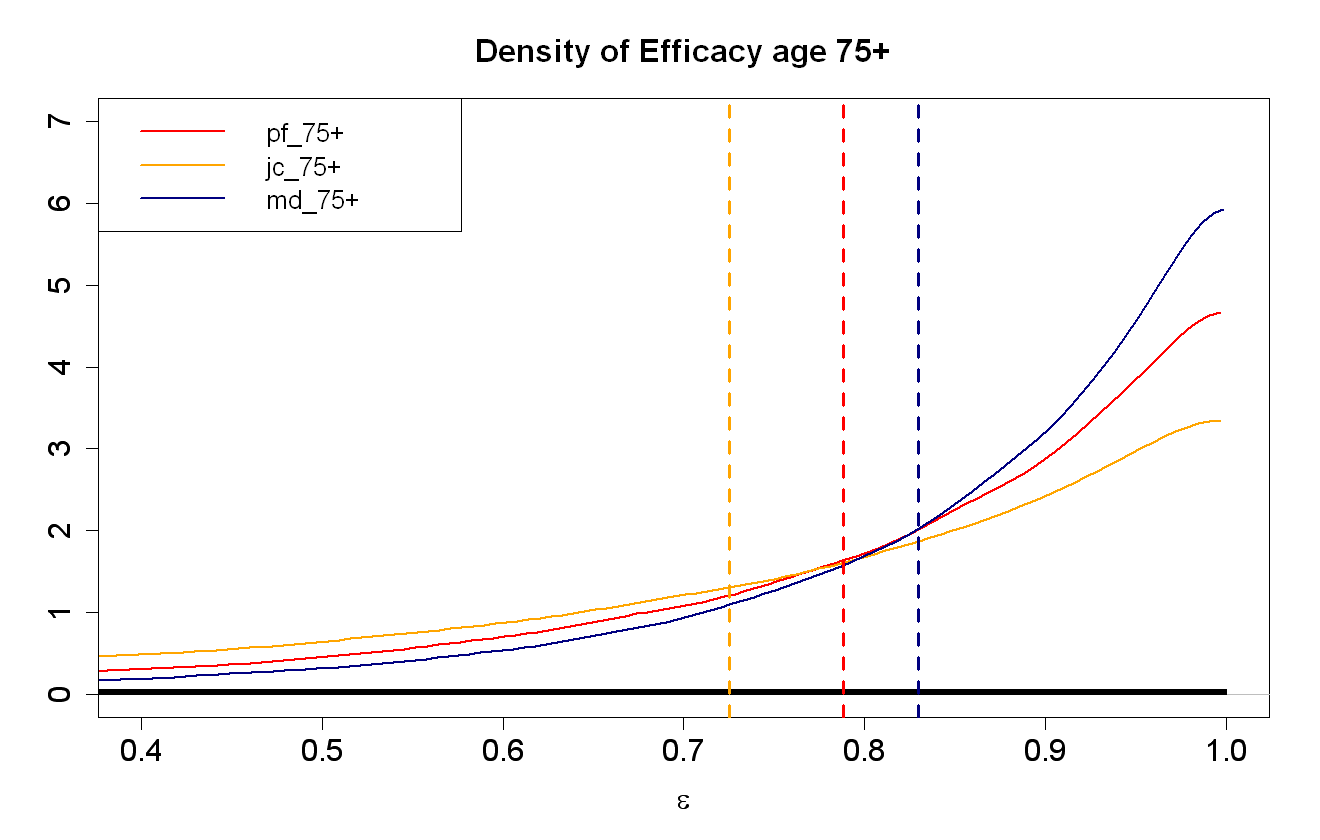

In [246]:
plot(pf_75_r[,1],trace=FALSE,col="red",xlab=expression(epsilon),xlim=c(0.4,1),ylim=c(0,7),lwd=2,cex.lab=1.5, cex.axis=1.5, cex.main=1.6,main="Density of Efficacy age 75+")
par(new=TRUE)
plot(jc_75_r[,1],trace=FALSE,col="orange",xlab=expression(epsilon),xlim=c(0.4,1),ylim=c(0,7),lwd=2,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
par(new=TRUE)
plot(md_75_r[,1],trace=FALSE,col="navy",xlab=expression(epsilon),xlim=c(0.4,1),ylim=c(0,7),lwd=2,cex.lab=1.5, cex.axis=1.5, cex.main=1.6)
par(new=TRUE)
abline(v = df_ages[3,2], col="red", lwd=3, lty=2)
abline(v = df_ages[6,2], col="orange", lwd=3, lty=2)
abline(v = df_ages[9,2], col="navy", lwd=3, lty=2)


legend("topleft", legend=c("pf_75+", "jc_75+","md_75+"),col=c("red", "orange","navy"), lty=c(1,1,1),lwd=c(2,2,2), cex=1.3)

Another ways that we tried:
* using rjags and add ages subgrpips to model and data
* using gamma 

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 13
   Total graph size: 33

Initializing model



nvI.pf,nv.pf,nPI.pf,nP.pf,age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,13549,143,13618,40
1,3074,14,3095,70
0,774,5,785,85


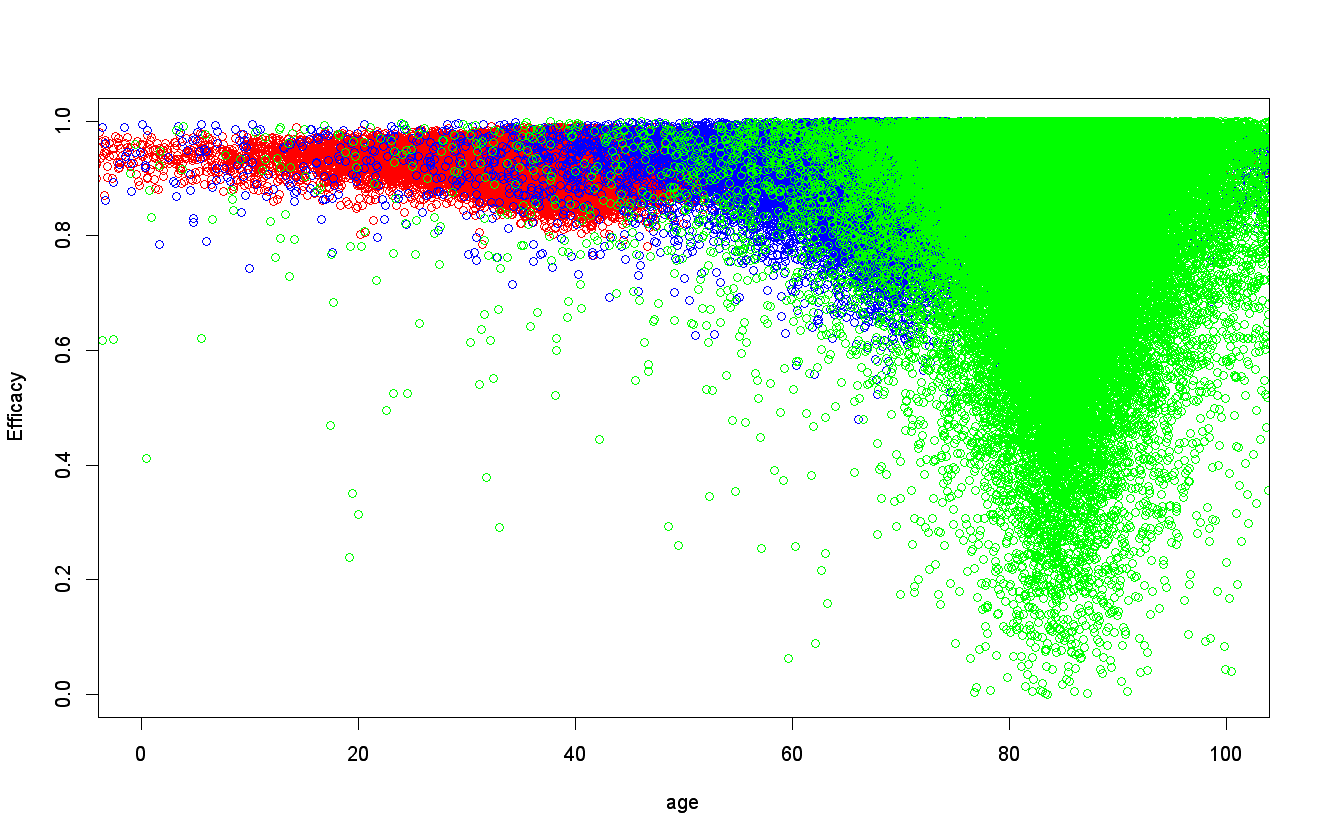

In [251]:
library(rjags)
library(coda)
library("rjags")
set.seed(12345)
N <-3 #number of subgroups by age 
age <- c(40,70,85) #where 1 = 16-64, 2= 65-74, 3 = 75 and older
model_age <- "model{
#likeihood:
for(i in 1:length(age)){
  nP.I[i] ~ dbin(pA, nP[i])         
  nV.A[i] ~ dbin(pA, nV[i]) 
  nV.I[i] ~ dbin(prob[i], nV.A[i]) 
  ages[i] ~ dnorm(age[i],probb[i]) 
}
# Priors
pA ~ dbeta(1,1)
for(i in 1:length(age)){
probb[i] ~ dbeta(1,10) 
prob[i] ~ dbeta(1,1) 
epsilon[i] <- 1 - prob[i]
}
}"
#pfizer
nvI.pf <-c(7,1,0)  
nv.pf <-c(13549,3074,774)
nPI.pf <-c(143,14,5)
nP.pf<-c(13618,3095,785)


df<- data.frame(nvI.pf,nv.pf,nPI.pf,nP.pf, age)
jags_data <- with(df, list(nV.I =nvI.pf, nV = nv.pf, nP.I = nPI.pf, nP = nP.pf , age=age))
jags_age <- jags.model(textConnection(model_age),data=jags_data,inits = list(.RNG.name = "base::Wichmann-Hill"))
update(jags_age,1000)
sim <- coda.samples(model=jags_age,variable.names = c("epsilon","nV.A","ages"),n.iter=100000)
chain.df <- as.data.frame( as.mcmc(sim) )


plot(chain.df$`ages[1]`,chain.df$`epsilon[1]`,col='red',xlim = c(0,100),ylim = c(0,1),xlab="age",ylab="Efficacy")
par(new=TRUE)
plot(chain.df$`ages[2]`,chain.df$`epsilon[2]`,col='blue',xlim = c(0,100),ylim = c(0,1),xlab="age",ylab="Efficacy")
par(new=TRUE)
plot(chain.df$`ages[3]`,chain.df$`epsilon[3]`,col='green',xlim = c(0,100),ylim = c(0,1),xlab="age",ylab="Efficacy")



* Age[1]: 18_64

* Age[2]: 64_75

* Age[3]: 75+

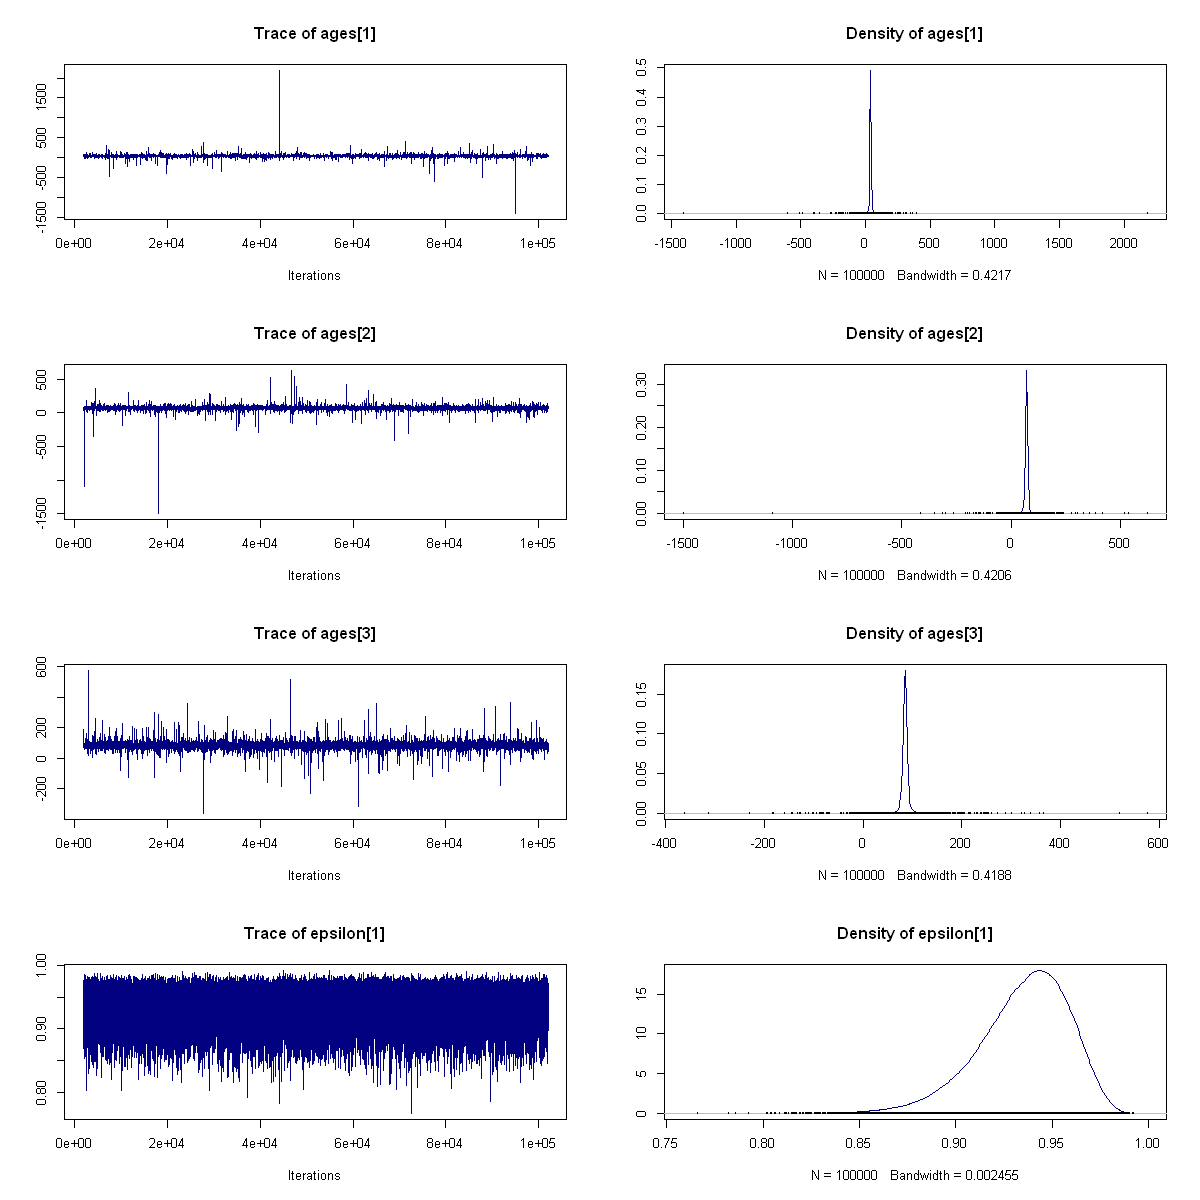

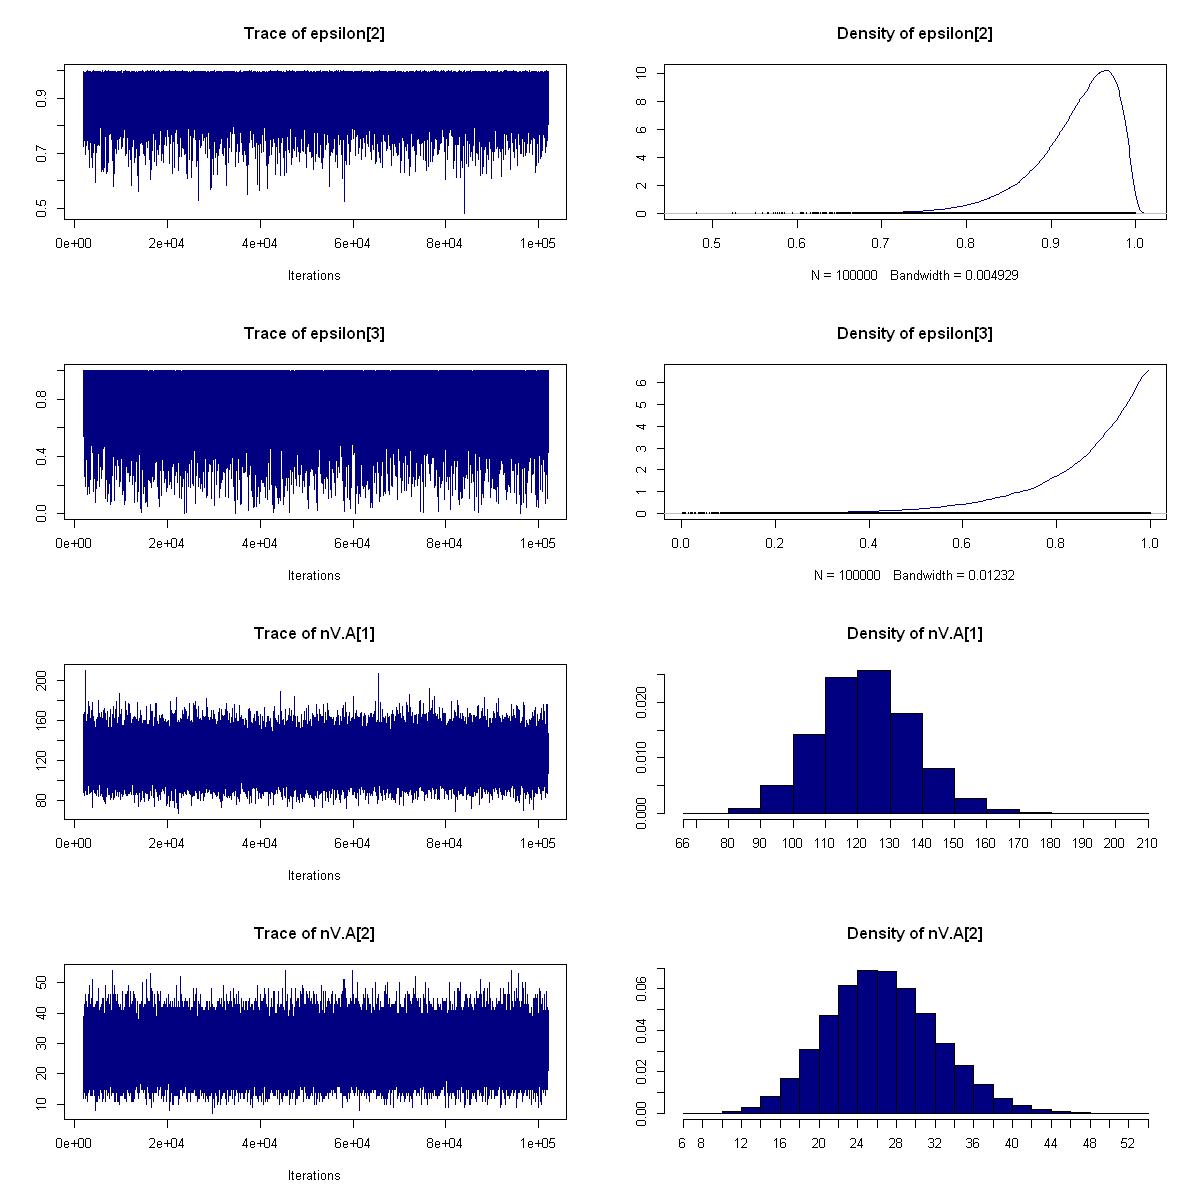

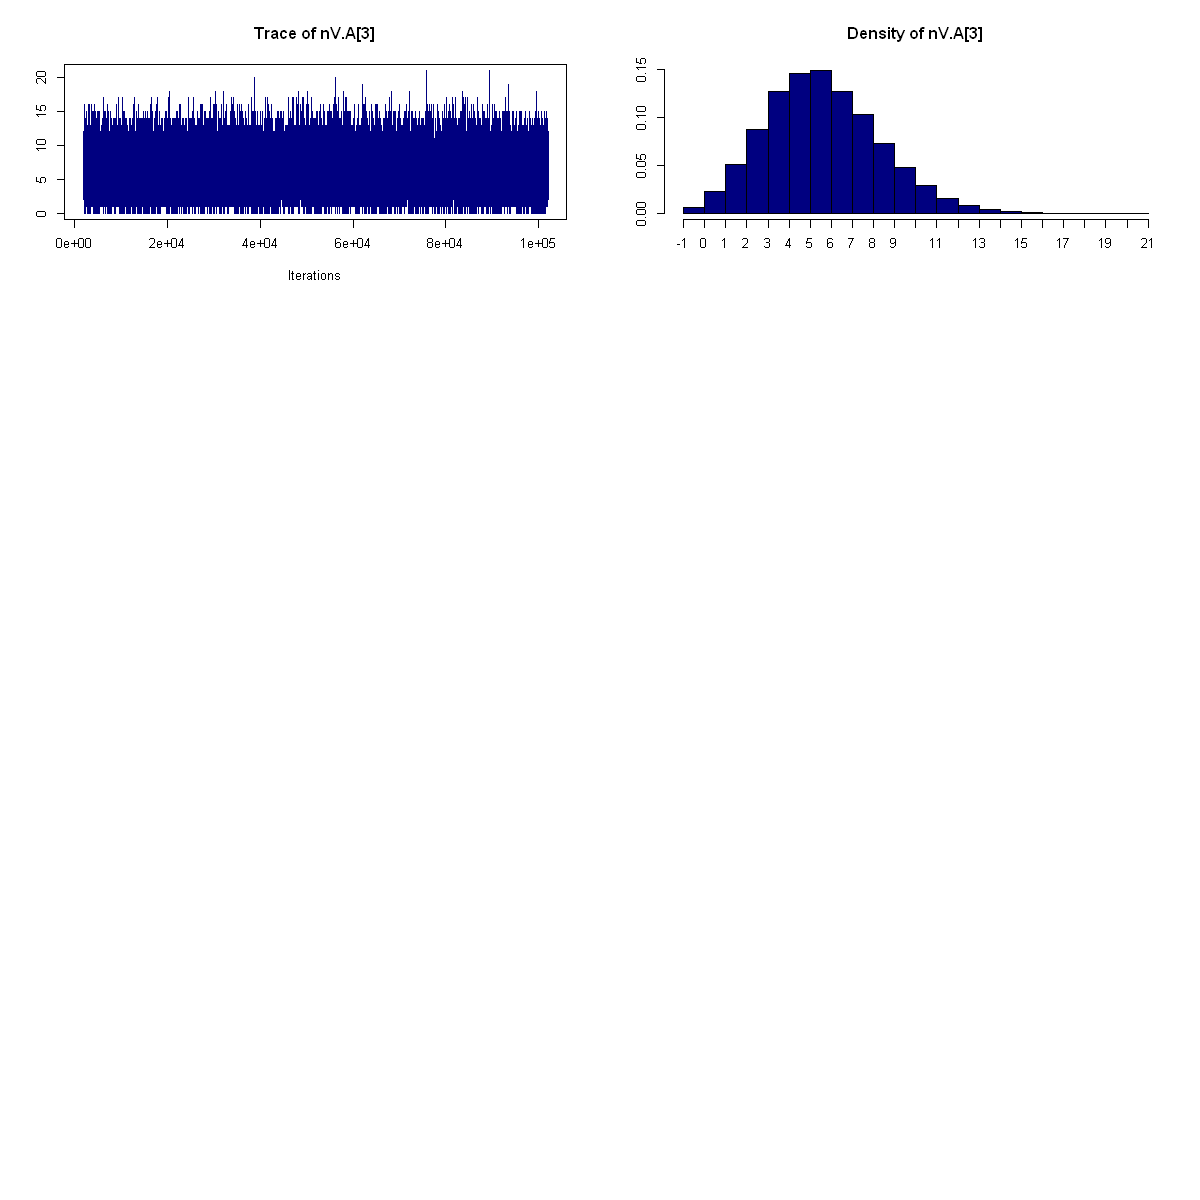

In [262]:
options(repr.plot.width=10, repr.plot.height =10)

plot(sim,col='navy')

About Bayes Factor

In [263]:
library(brms)

Loading required package: Rcpp

Loading 'brms' package (version 2.17.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: 'brms'


The following object is masked from 'package:rstan':

    loo


The following object is masked from 'package:stats':

    ar




In [ ]:
tot_vaccine <- 21999
tot_placebo <- 21539
patient <- c(rep("Vaccine", tot_vaccine),
             rep("Placebo", tot_placebo ))
# Number of patients tested postive after RCT:
pos_vaccine <- 8
pos_placebo <- 86
tested <- c(rep("Pos", pos_vaccine),
            rep("Neg", tot_vaccine - pos_vaccine),
            rep("Pos", pos_placebo),
            rep("Neg", tot_placebo - pos_placebo ))
pfizer.tb <- tibble(tested = tested , patient=patient)
table(pfizer.tb[[2]], pfizer.tb[[1]])


modelString <- "
model {
for ( i in 1:Ntot ) {
tested[i] ˜ dbern( theta[patient[i]] )
}
for ( k in 1:Nclass ) {
theta[k] ˜ dbeta(3 , 100)
}
}"


dataList = list(
  tested = ifelse(pfizer.tb$tested == "Neg", 0, 1),
  patient = as.integer(factor(pfizer.tb$patient )),
  Ntot = nrow(pfizer.tb) ,
  Nclass = nlevels(factor(pfizer.tb$patient ))
)

age <- c(rep("lt65", 8350), rep("Older", 4505),
         rep("lt65", 8294), rep("Older", 4501))
treatment <- c(rep("Placebo", 8350), rep("Placebo", 4505),
               rep("Vaccine", 8294), rep("Vaccine", 4501))
tested <- c(rep("Pos", 79), rep("Neg", 8271),
            rep("Pos", 11), rep("Neg", 4494),
            rep("Pos", 1), rep("Neg", 8293),
            rep("Pos", 4), rep("Neg", 4497))
moderna_tb <- tibble(age = age , tested = tested ,
                     treatment = treatment )


moderna_bf <- brm(data = moderna_tb,family = bernoulli (link = logit),tested ~ age + treatment + age:treatment ,iter = 12500, warmup = 500, chains = 4, cores = 12,control = list(adapt_delta = 0.99, max_treedepth = 12),seed = 9 , file = "moderna_long")

summary(moderna_bf)

mcmc_plot(moderna_bf, type='areas')

bayestestR :: describe_posterior (moderna_bf ,ci=0.95,test=c("p_direction"),centrality ="MAP")


We found efficacy for 3 subgroups for 3 vaccines: 18-65 years old, 65-75 years old and 75+(for this we will take 75-100 for easier analysis). 
Since we do not have any prior information about the efficacy of the vaccines, we will assume a uniform prior with 
1/3 probability for every subgroup. 

$$ 
g(\mu) =1
$$

For each subroup we divide the age groups to 2 year intervals and take their efficacy as it is taken in the clinical trials. 

The posterior would be a gamma distribution:





$Gamma(\alpha,\lambda) $ where $\alpha =\sum{y}_{i}+1, \lambda = n$ 

n is the number of divisions of the years.

In [1]:
#efficacies of vaccines by age group

e_jc_18 <- 0.651
e_jc_65 <-0.74
e_jc_75 <- 1

e_md_18 <-0.956
e_md_65 <- 0.824
e_md_75 <- 1

e_pf_18 <- 0.951
e_pf_65 <- 0.929
e_pf_75 <- 1

#we devide the age into 2 year intervals 
#we have 23 intervals aged 18-65, each having 2 years. 
#5 intervals 65-74
#13 intervals 75-100

#yi
data_jc<-c(rep(e_jc_18,23),rep(e_jc_65,5),rep(e_jc_75,13))
data_md <- c(rep(e_md_18,23),rep(e_md_65,5),rep(e_md_75,13))
data_pf <-c(rep(e_pf_18,23),rep(e_pf_65,5),rep(e_pf_75,13))

#yi sum 
y_jc <-sum(data_jc)
y_md<-sum(data_md)
y_pf<-sum(data_pf)

n <- length(data_jc)

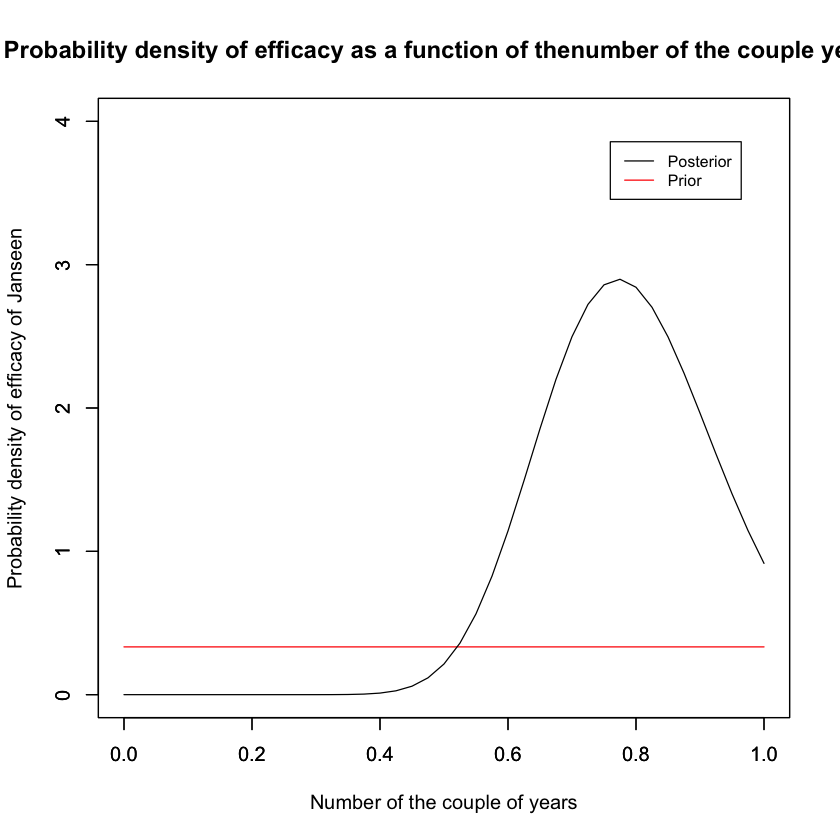

In [2]:
#define a uniform prior
p.prior <- c(rep(1/3,n))
x<- seq(0,1, by=1/(n-1) ) 
p.post_jc <- dgamma(x,shape = y_jc+1,rate = n)
plot(x,p.prior,type='l',ylim = c(0,4), ylab = '',xlab='',col= 'red')
par(new=TRUE)
plot(x,p.post_jc,ylim = c(0,4), xlab  = 'Number of the couple of years',ylab='Probability density of efficacy of Janseen',type='l',main = "Probability density of efficacy as a function of thenumber of the couple years")

legend("topright", 
       inset=0.07, 
       legend=c("Posterior", "Prior"),
       col=c("black","red"), 
       lty=1:1, 
       cex=0.8,
       box.lty=1)   

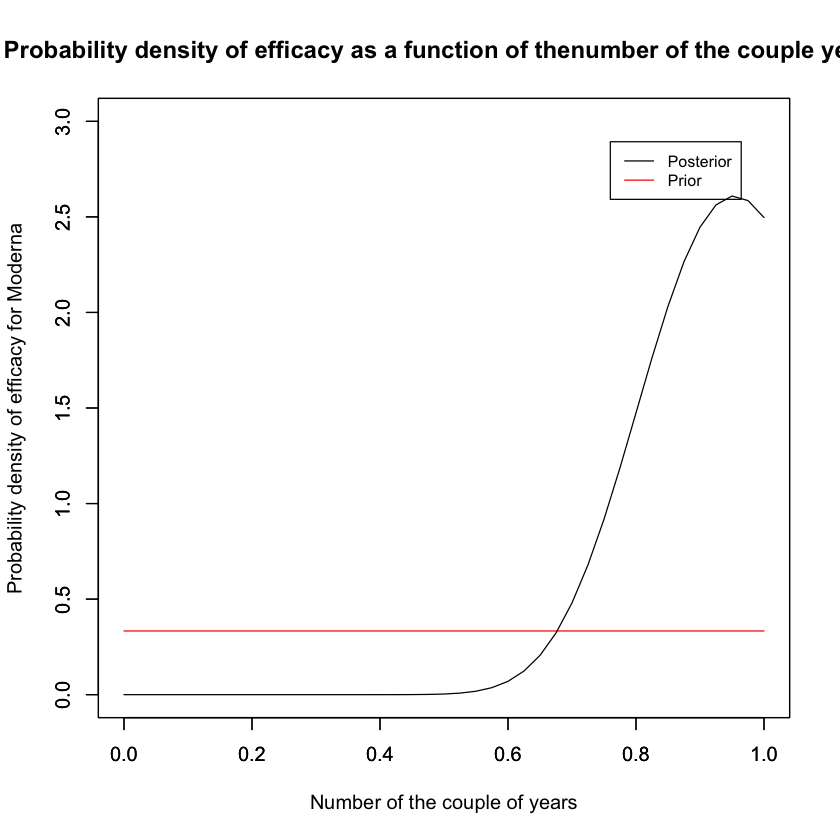

In [3]:
p.post_md <- dgamma(x,shape = y_md+1,rate = n)
plot(x,p.prior,type='l',ylim = c(0,3), ylab = '',xlab='',col= 'red')
par(new=TRUE)
plot(x,p.post_md,ylim = c(0,3),xlab = 'Number of the couple of years',ylab='Probability density of efficacy for Moderna',type='l',main = "Probability density of efficacy as a function of thenumber of the couple years")

legend("topright", 
       inset=0.07, 
       legend=c("Posterior", "Prior"),
       col=c("black","red"), 
       lty=1:1, 
       cex=0.8,
       box.lty=1)   


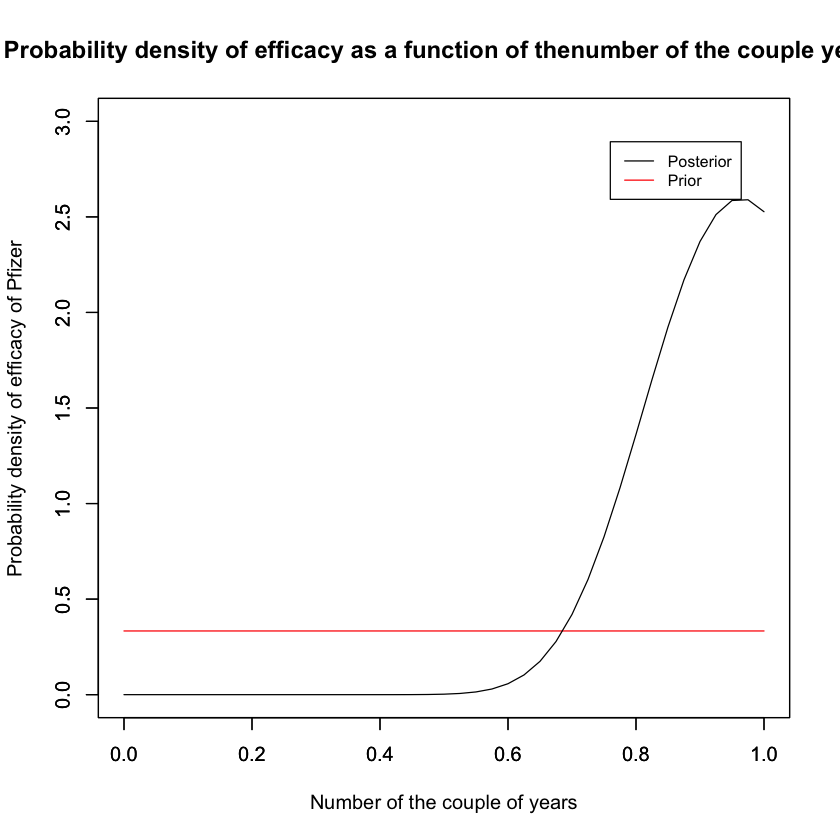

In [4]:
p.post_pf <- dgamma(x,shape = y_pf+1,rate = n)
plot(x,p.prior,type='l',ylim = c(0,3), ylab = '',xlab='',col= 'red')
par(new=TRUE)
plot(x,p.post_pf,ylim=c(0,3),xlab = 'Number of the couple of years',ylab='Probability density of efficacy of Pfizer',type='l',main = "Probability density of efficacy as a function of thenumber of the couple years")

legend("topright", 
       inset=0.07, 
       legend=c("Posterior", "Prior"),
       col=c("black","red"), 
       lty=1:1, 
       cex=0.8,
       box.lty=1)   
